# MULTIPLE LINEAR REGRESSION

## PRICE OF CARS

### STEP-01: READING THE DATA

In [387]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [388]:
cars=pd.read_csv("CarPrice_Assignment.csv")

In [389]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [390]:
cars.shape

(205, 26)

In [391]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## step-02: Understanding the data

In [392]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [393]:
cars.drop('car_ID', axis=1, inplace=True)


In [394]:
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 3600x3600 with 0 Axes>

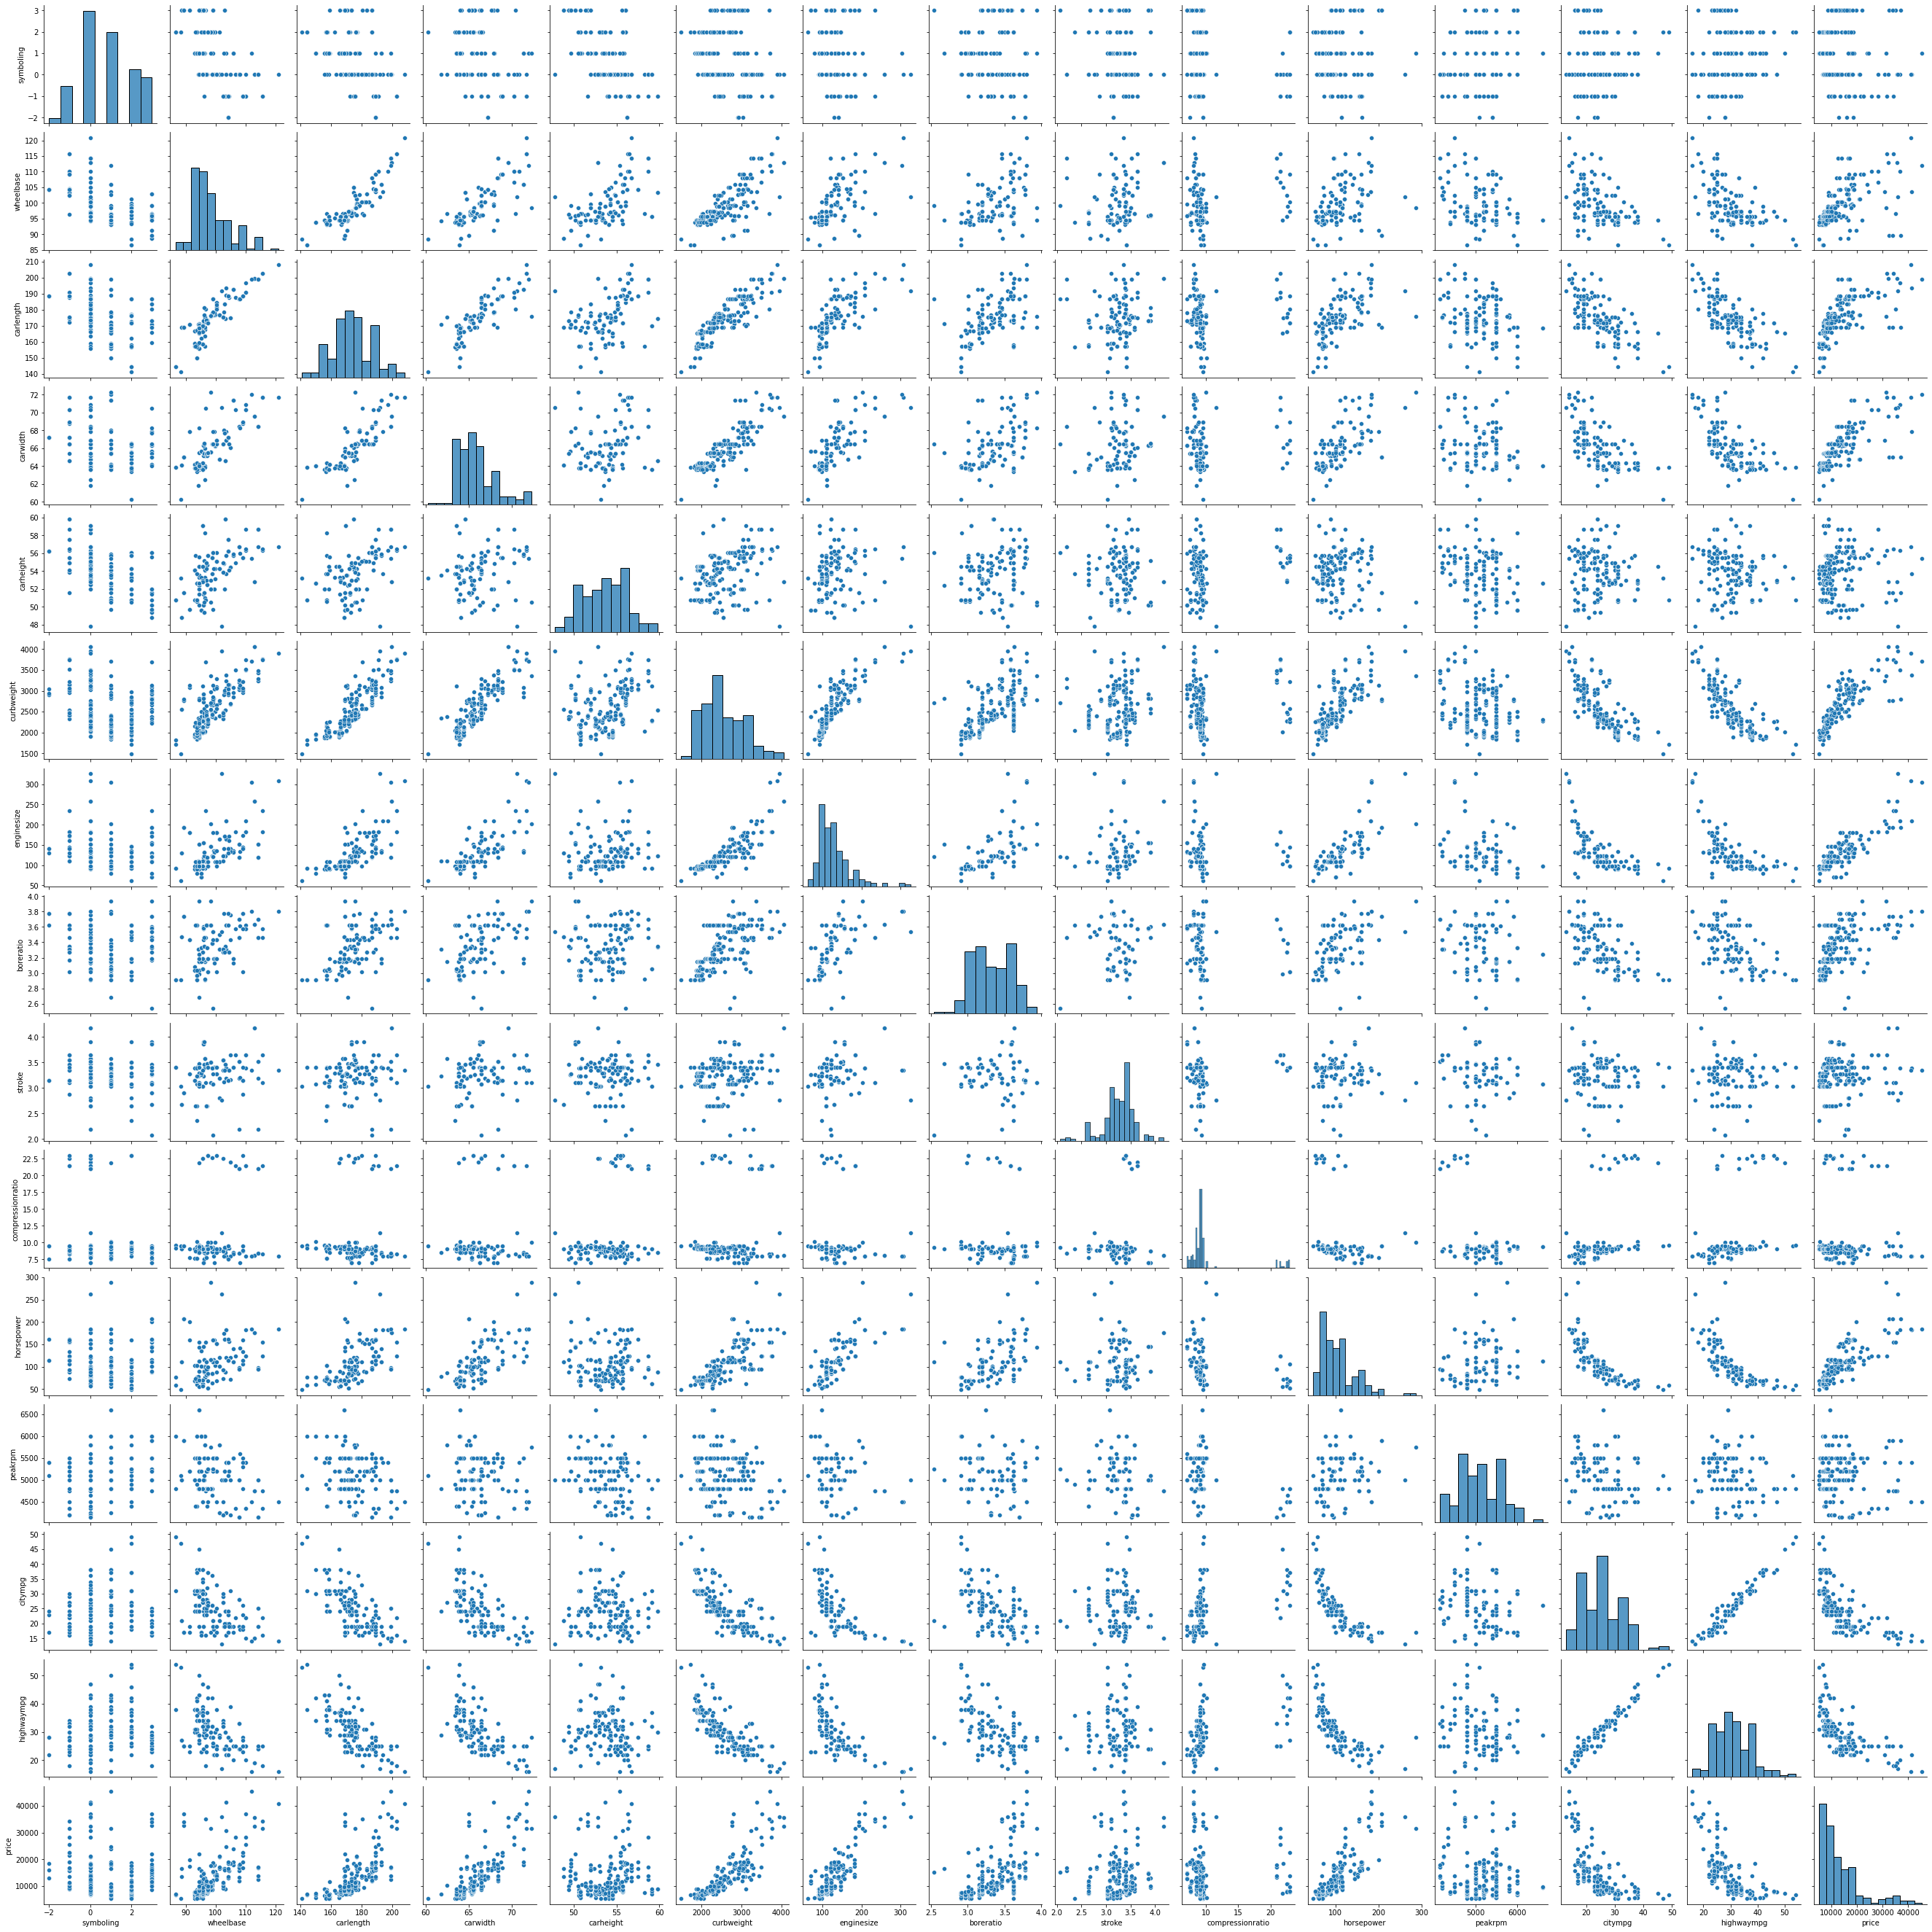

In [395]:
plt.figure(figsize=(50,50))
sns.pairplot(cars)

In [396]:
cars.drop(['carheight','peakrpm','stroke','compressionratio'],axis=1, inplace =True)

In [397]:
cars.shape

(205, 21)

In [398]:
car_Company=list(cars['CarName'])
result=[str(x).split(" ")[0] for x in car_Company]

In [399]:
cars['car_Company']=pd.Series(result)
cars["car_Company"]=cars["car_Company"].replace("maxda","mazda")
cars["car_Company"]=cars["car_Company"].replace("porcshce","porsche")
cars["car_Company"]=cars["car_Company"].replace("toyouta","toyota")
cars["car_Company"]=cars["car_Company"].replace("vokswagen","volkswagen")
cars["car_Company"]=cars["car_Company"].replace("Nissan","nissan")
cars["drivewheel"]=cars['drivewheel'].replace("4wd","fwd")

In [400]:
cars

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,car_Company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,ohc,four,141,mpfi,3.78,114,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,ohc,four,141,mpfi,3.78,160,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,ohcv,six,173,mpfi,3.58,134,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,ohc,six,145,idi,3.01,106,26,27,22470.0,volvo


<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

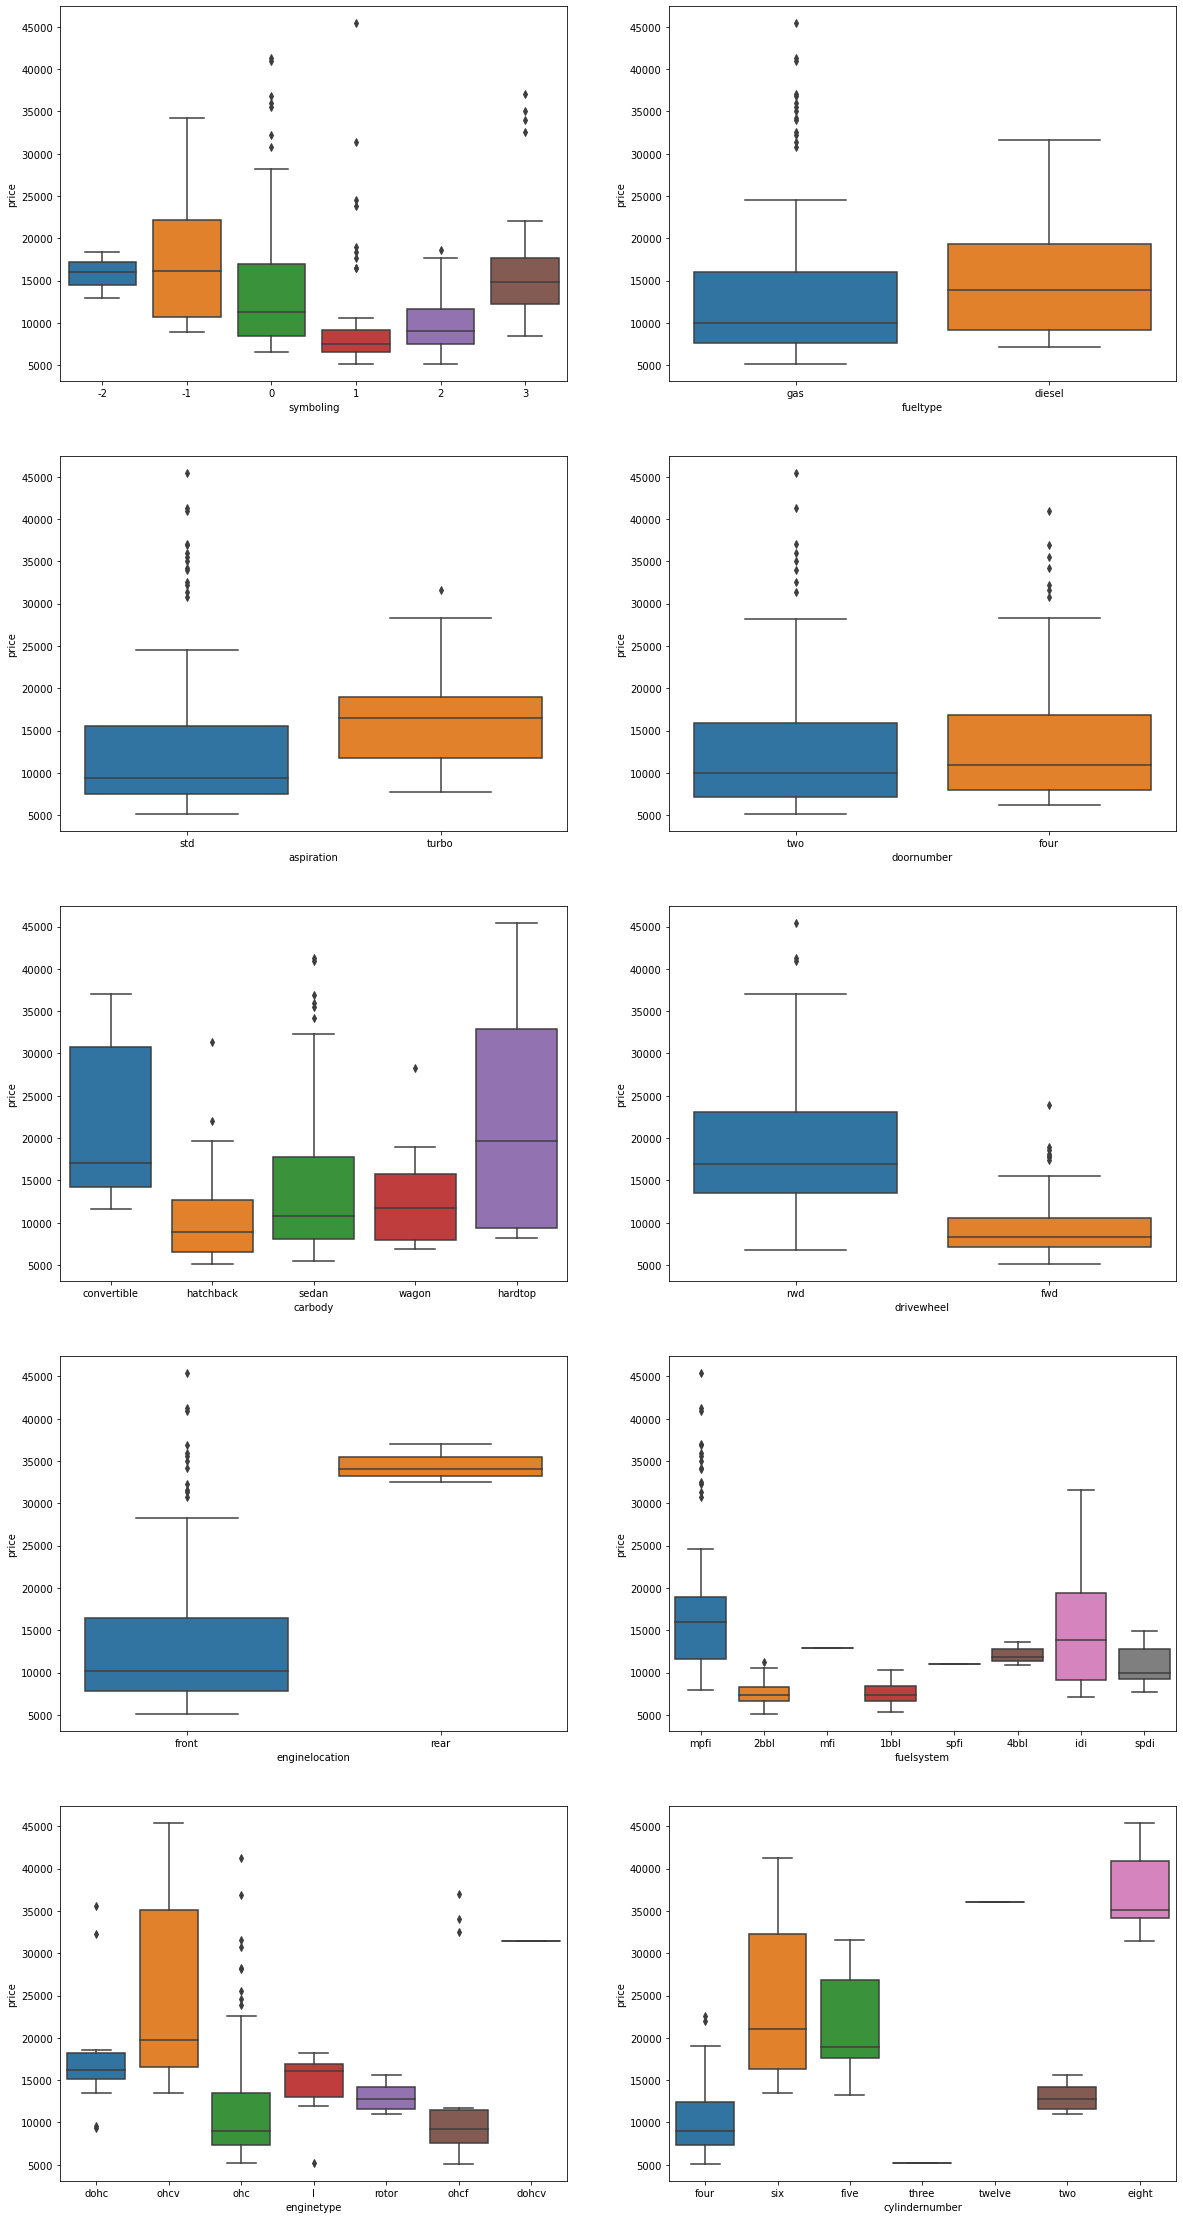

In [401]:
plt.figure(figsize=(20,40))
plt.subplot(5,2,1)
sns.boxplot(x="symboling",y='price',data=cars)
plt.subplot(5,2,2)
sns.boxplot(x="fueltype",y='price',data=cars)
plt.subplot(5,2,3)
sns.boxplot(x="aspiration",y='price',data=cars)
plt.subplot(5,2,4)
sns.boxplot(x="doornumber",y='price',data=cars)
plt.subplot(5,2,5)
sns.boxplot(x="carbody",y='price',data=cars)
plt.subplot(5,2,6)
sns.boxplot(x="drivewheel",y='price',data=cars)
plt.subplot(5,2,7)
sns.boxplot(x="enginelocation",y='price',data=cars)
plt.subplot(5,2,8)
sns.boxplot(x="fuelsystem",y='price',data=cars)
plt.subplot(5,2,9)
sns.boxplot(x="enginetype",y='price',data=cars)
plt.subplot(5,2,10)
sns.boxplot(x="cylindernumber",y='price',data=cars)

## step-03: Preparing the data

In [402]:
var_list=['fueltype','aspiration','doornumber','drivewheel','enginelocation']
def binary_map(x):
    return x.map({'gas':0,'diesel':1,'std':1,'turbo':0,'two':1,'four':0,'rwd':0,'fwd':1,'front':0,'rear':1})
cars[var_list]=cars[var_list].apply(binary_map)

In [403]:
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,car_Company
0,3,alfa-romero giulia,0,1,1,convertible,0,0,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,0,1,1,convertible,0,0,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,0,1,1,hatchback,0,0,94.5,171.2,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,2,audi 100 ls,0,1,0,sedan,1,0,99.8,176.6,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,2,audi 100ls,0,1,0,sedan,1,0,99.4,176.6,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


In [404]:
print(cars['car_Company'].nunique())
print(cars['carbody'].nunique())
print(cars['fuelsystem'].nunique())
print(cars['cylindernumber'].nunique())
print(cars['enginetype'].nunique())

23
5
8
7
7


In [405]:
status=pd.get_dummies(cars['car_Company'], drop_first=True)
cars=pd.concat([cars,status],axis=1)
status=pd.get_dummies(cars['carbody'], drop_first=True)
cars=pd.concat([cars,status],axis=1)
status=pd.get_dummies(cars['fuelsystem'], drop_first=True)
cars=pd.concat([cars,status],axis=1)
status=pd.get_dummies(cars['cylindernumber'], drop_first=True)
cars=pd.concat([cars,status],axis=1)
status=pd.get_dummies(cars['enginetype'], drop_first=True)
cars=pd.concat([cars,status],axis=1)

In [406]:
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,alfa-romero giulia,0,1,1,convertible,0,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero stelvio,0,1,1,convertible,0,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero Quadrifoglio,0,1,1,hatchback,0,0,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,audi 100 ls,0,1,0,sedan,1,0,99.8,176.6,...,0,0,0,0,0,0,1,0,0,0
4,2,audi 100ls,0,1,0,sedan,1,0,99.4,176.6,...,0,0,0,0,0,0,1,0,0,0


In [407]:
cars.drop(['car_Company','carbody','fuelsystem','cylindernumber','enginetype','mercury'],axis=1,inplace=True)

In [408]:
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,alfa-romero giulia,0,1,1,0,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero stelvio,0,1,1,0,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero Quadrifoglio,0,1,1,0,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,0,1,0
3,2,audi 100 ls,0,1,0,1,0,99.8,176.6,66.2,...,0,0,0,0,0,0,1,0,0,0
4,2,audi 100ls,0,1,0,1,0,99.4,176.6,66.4,...,0,0,0,0,0,0,1,0,0,0


In [409]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       205 non-null    int64  
 1   CarName         205 non-null    object 
 2   fueltype        205 non-null    int64  
 3   aspiration      205 non-null    int64  
 4   doornumber      205 non-null    int64  
 5   drivewheel      205 non-null    int64  
 6   enginelocation  205 non-null    int64  
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginesize      205 non-null    int64  
 12  boreratio       205 non-null    float64
 13  horsepower      205 non-null    int64  
 14  citympg         205 non-null    int64  
 15  highwaympg      205 non-null    int64  
 16  price           205 non-null    float64
 17  audi            205 non-null    uin

In [410]:
cars.drop(['dohcv','three','twelve','spfi','mfi'],axis=1,inplace=True)

In [411]:
cars.drop('CarName',axis=1, inplace=True)

In [412]:
cars.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,...,spdi,five,four,six,two,l,ohc,ohcf,ohcv,rotor
0,3,0,1,1,0,0,88.6,168.8,64.1,2548,...,0,0,1,0,0,0,0,0,0,0
1,3,0,1,1,0,0,88.6,168.8,64.1,2548,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,1,0,0,94.5,171.2,65.5,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,0,1,0,1,0,99.8,176.6,66.2,2337,...,0,0,1,0,0,0,1,0,0,0
4,2,0,1,0,1,0,99.4,176.6,66.4,2824,...,0,1,0,0,0,0,1,0,0,0


In [413]:
cars=cars.rename(columns = {"five": "cylindernumber_5", 
                                  "four":"cylindernumber_4", 
                                  "six": "cylindernumber_6","two":"cylindernumber_2"})

In [414]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   enginelocation    205 non-null    int64  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginesize        205 non-null    int64  
 11  boreratio         205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
 16  audi              205 non-null    uint8  
 1

In [415]:
cars.shape

(205, 55)

## step-04: Data splitting and scaling

In [416]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [417]:
mn=MinMaxScaler()

In [418]:
df_train,df_test=train_test_split(cars, train_size=0.7, random_state=100)

In [419]:
num_vars=['symboling', 'wheelbase', 'carlength', 'carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
df_train[num_vars]=mn.fit_transform(df_train[num_vars])

In [420]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,...,spdi,cylindernumber_5,cylindernumber_4,cylindernumber_6,cylindernumber_2,l,ohc,ohcf,ohcv,rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.090909,0.818182,0.440559,0.650350,0.006993,0.411141,0.525476,0.461655,0.407878,...,0.041958,0.062937,0.741259,0.132867,0.027972,0.062937,0.685315,0.083916,0.062937,0.027972
std,0.239200,0.288490,0.387050,0.498199,0.478536,0.083624,0.205581,0.204848,0.184517,0.211269,...,0.201198,0.243703,0.439483,0.340624,0.165472,0.243703,0.466023,0.278236,0.243703,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,1.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.355702,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.600000,0.000000,1.000000,1.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.559542,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

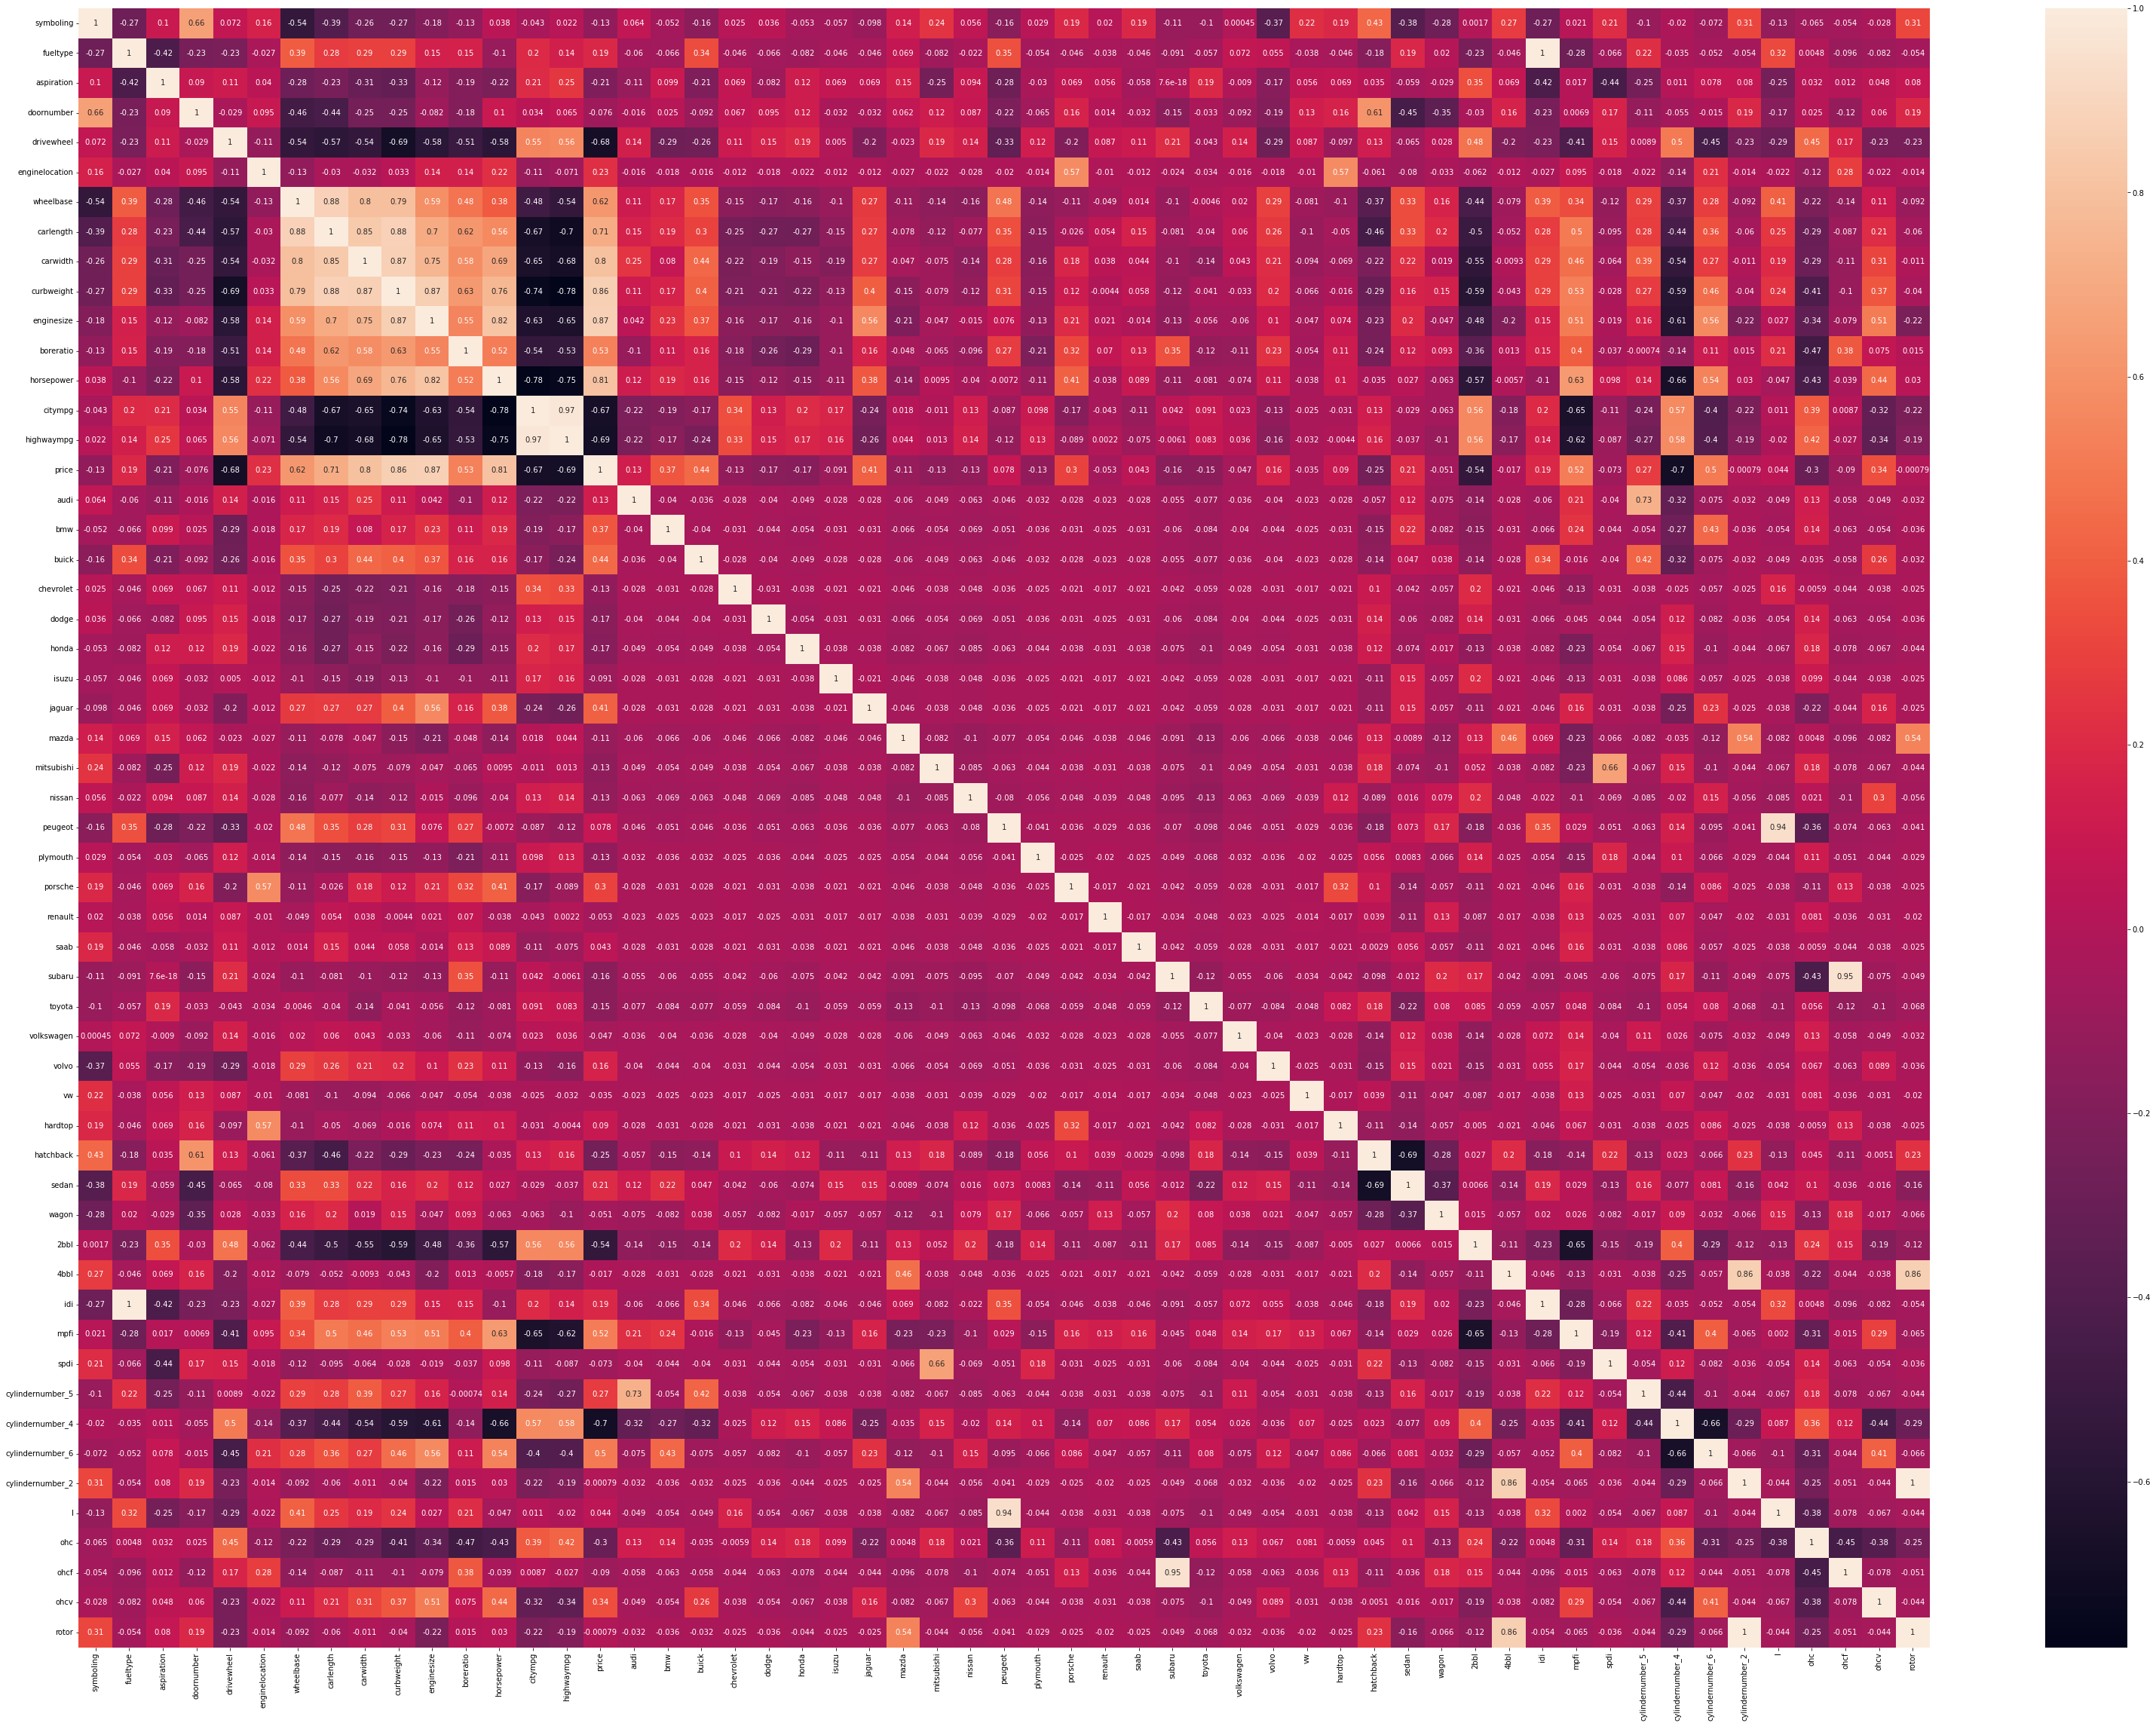

In [421]:
plt.figure(figsize=(55,40))
sns.heatmap(df_train.corr(),annot=True)


In [422]:
y_train=df_train.pop('price')
X_train=df_train

In [423]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,...,spdi,cylindernumber_5,cylindernumber_4,cylindernumber_6,cylindernumber_2,l,ohc,ohcf,ohcv,rotor
122,0.6,0,1,0,1,0,0.244828,0.426016,0.291667,0.272692,...,0,0,1,0,0,0,1,0,0,0
125,1.0,0,1,1,0,0,0.272414,0.452033,0.666667,0.500388,...,0,0,1,0,0,0,1,0,0,0
166,0.6,0,1,1,0,0,0.272414,0.448780,0.308333,0.314973,...,0,0,1,0,0,0,0,0,0,0
1,1.0,0,1,1,0,0,0.068966,0.450407,0.316667,0.411171,...,0,0,1,0,0,0,0,0,0,0
199,0.2,0,0,0,0,0,0.610345,0.775610,0.575000,0.647401,...,0,0,1,0,0,0,1,0,0,0


In [424]:
y_train.shape

(143,)

In [425]:
import statsmodels.api as sm

In [426]:
np.asarray(X_train)

array([[0.6, 0. , 1. , ..., 0. , 0. , 0. ],
       [1. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0.6, 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0.2, 1. , 0. , ..., 0. , 0. , 0. ],
       [0.6, 0. , 1. , ..., 0. , 0. , 0. ],
       [0.6, 0. , 0. , ..., 0. , 0. , 0. ]])

In [427]:
X_train_sm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_sm).fit()

lr_1.params

const                 868.231424
symboling             617.969124
fueltype             -616.377777
aspiration          -1445.329820
doornumber           -101.730280
drivewheel          -1048.678894
enginelocation       8750.555912
wheelbase            5864.247235
carlength           -6215.151254
carwidth            12183.857726
curbweight          13230.228177
enginesize          26950.358821
boreratio          -10512.728997
horsepower           4014.545836
citympg             -2918.760082
highwaympg           4809.697072
audi                 2979.445518
bmw                 10768.693148
buick                3910.552279
chevrolet           -1007.110154
dodge               -1829.160682
honda               -2063.157818
isuzu                 668.879003
jaguar               -187.120744
mazda                -757.367656
mitsubishi          -3287.431167
nissan                -89.709090
peugeot            -16245.660169
plymouth            -1754.699194
porsche              6810.898589
renault   

In [428]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     45.31
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.98e-47
Time:                        19:13:59   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2604.
Df Residuals:                      91   BIC:                             2758.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              868.2314   5560.991      0.156      0.876   -1.02e+04    1.19e+04
symboling          617.9691   1585.874      0.390      0.698   -2532.174    3768.112
fueltype          -616.3778   1220.076     -0.505      0.615   -3039.910    1807.154
aspiration       -1445.3298    999.265     -1.446      0.152   -3430.247     539.588
doornumber        -101.7303    635.299     -0.160      0.873   -1363.673    1160.212
drivewheel       -1048.6789   1012.599     -1.036      0.303   -3060.083     962.725
enginelocation    8750.5559   2828.704      3.093      0.003    3131.683    1.44e+04
wheelbase         5864.2472   3749.032      1.564      0.121   -1582.745    1.33e+04
carlength        -6215.1513   4077.583     -1.524      0.131   -1.43e+04    1884.466
carwidth          1.218e+04   4262.831      2.858      0.005    3716.267    2.07e+04
curbweight        1.323e+04   4513.295      2.931      0.004    4265.121    2.22e+04
enginesize        2.695e+04   1.09e+04      2.474      0.015    5315.237    4.86e+04
boreratio        -1.051e+04   4663.564     -2.254      0.027   -1.98e+04   -1249.133
horsepower        4014.5458   6108.366      0.657      0.513   -8118.972    1.61e+04
citympg          -2918.7601   6399.467     -0.456      0.649   -1.56e+04    9792.994
highwaympg        4809.6971   5825.750      0.826      0.411   -6762.440    1.64e+04
audi              2979.4455   2987.995      0.997      0.321   -2955.839    8914.730
bmw               1.077e+04   3068.585      3.509      0.001    4673.326    1.69e+04
buick             3910.5523   3216.429      1.216      0.227   -2478.489    1.03e+04
chevrolet        -1007.1102   2693.399     -0.374      0.709   -6357.217    4342.997
dodge            -1829.1607   2201.039     -0.831      0.408   -6201.255    2542.934
honda            -2063.1578   2957.446     -0.698      0.487   -7937.762    3811.446
isuzu              668.8790   2564.289      0.261      0.795   -4424.766    5762.524
jaguar            -187.1207   3314.503     -0.056      0.955   -6770.975    6396.733
mazda             -757.3677   2269.424     -0.334      0.739   -5265.300    3750.565
mitsubishi       -3287.4312   2289.811     -1.436      0.155   -7835.859    1260.996
nissan             -89.7091   2263.090     -0.040      0.968   -4585.060    4405.642
peugeot          -1.625e+04   4912.771     -3.307      0.001    -2.6e+04   -6487.043
plymouth         -1754.6992   2183.180     -0.804      0.424   -6091.317    2581.919
porsche           6810.8986   4195.467      1.623      0.108   -1522.881    1.51e+04
renault          -1925.2562   2751.207     -0.700      0.486   -7390.191    3539.678
saab              3005.7871   2832.714      1.061      0.291   -2621.052    8632.626
subaru           -4027.1551   2536.945     -1.587      0.116   -9066.484    1012.173
toyota           -1435.

In [429]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [430]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
53,rotor,inf
5,enginelocation,inf
31,subaru,inf
42,idi,inf
48,cylindernumber_2,inf
1,fueltype,inf
51,ohcf,inf
10,enginesize,303.81
13,citympg,248.46
46,cylindernumber_4,235.24


In [431]:
X=X_train.drop('nissan',axis=1)

In [432]:
X_sm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_sm).fit()


In [433]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           5.77e-48
Time:                        19:14:05   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2602.
Df Residuals:                      92   BIC:                             2753.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              778.5331   5052.151      0.154      0.878   -9255.476    1.08e+04
symboling          610.5487   1566.218      0.390      0.698   -2500.096    3721.194
fueltype          -614.5804   1212.600     -0.507      0.613   -3022.908    1793.747
aspiration       -1444.0706    993.326     -1.454      0.149   -3416.902     528.760
doornumber        -103.4745    630.325     -0.164      0.870   -1355.354    1148.405
drivewheel       -1057.7086    981.276     -1.078      0.284   -3006.608     891.190
enginelocation    8702.3915   2540.555      3.425      0.001    3656.630    1.37e+04
wheelbase         5852.2015   3716.365      1.575      0.119   -1528.821    1.32e+04
carlength        -6198.8709   4034.773     -1.536      0.128   -1.42e+04    1814.537
carwidth          1.218e+04   4238.410      2.874      0.005    3761.945    2.06e+04
curbweight        1.325e+04   4467.804      2.965      0.004    4374.041    2.21e+04
enginesize        2.714e+04   9737.591      2.787      0.006    7799.814    4.65e+04
boreratio        -1.063e+04   3638.332     -2.921      0.004   -1.79e+04   -3401.345
horsepower        3989.3712   6042.206      0.660      0.511   -8010.971     1.6e+04
citympg          -2988.7677   6117.478     -0.489      0.626   -1.51e+04    9161.072
highwaympg        4868.1607   5605.304      0.868      0.387   -6264.456     1.6e+04
audi              3049.6635   2393.210      1.274      0.206   -1703.459    7802.786
bmw               1.087e+04   1724.362      6.303      0.000    7444.324    1.43e+04
buick             3973.9100   2776.008      1.432      0.156   -1539.482    9487.302
chevrolet         -922.4593   1632.442     -0.565      0.573   -4164.629    2319.711
dodge            -1754.6191   1137.649     -1.542      0.126   -4014.088     504.850
honda            -1984.7748   2187.240     -0.907      0.367   -6328.823    2359.273
isuzu              752.7107   1442.319      0.522      0.603   -2111.859    3617.281
jaguar            -156.8785   3207.955     -0.049      0.961   -6528.154    6214.397
mazda             -675.8062    952.276     -0.710      0.480   -2567.108    1215.495
mitsubishi       -3209.7080   1176.277     -2.729      0.008   -5545.896    -873.520
peugeot          -1.626e+04   4863.665     -3.344      0.001   -2.59e+04   -6604.618
plymouth         -1684.7329   1277.886     -1.318      0.191   -4222.724     853.258
porsche           6930.7821   2892.022      2.397      0.019    1186.977    1.27e+04
renault          -1846.4809   1892.258     -0.976      0.332   -5604.669    1911.707
saab              3094.3181   1733.025      1.786      0.077    -347.619    6536.255
subaru           -3956.2392   1788.986     -2.211      0.029   -7509.321    -403.158
toyota           -1359.5699    882.565     -1.540      0.127   -3112.421     393.281
volkswagen        -519.

In [434]:
X=X.drop('jaguar',axis=1)

In [435]:
X_sm=sm.add_constant(X)
lr_3=sm.OLS(y_train,X_sm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     48.20
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           8.26e-49
Time:                        19:14:05   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2600.
Df Residuals:                      93   BIC:                             2748.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              844.5403   4842.327      0.174      0.862   -8771.361    1.05e+04
symboling          611.6576   1557.632      0.393      0.695   -2481.491    3704.806
fueltype          -603.6792   1185.524     -0.509      0.612   -2957.895    1750.536
aspiration       -1434.4987    968.613     -1.481      0.142   -3357.973     488.975
doornumber        -102.9783    626.854     -0.164      0.870   -1347.785    1141.829
drivewheel       -1055.2657    974.733     -1.083      0.282   -2990.893     880.361
enginelocation    8705.6860   2526.004      3.446      0.001    3689.543    1.37e+04
wheelbase         5808.3226   3587.028      1.619      0.109   -1314.803    1.29e+04
carlength        -6147.6249   3875.361     -1.586      0.116   -1.38e+04    1548.074
carwidth          1.219e+04   4212.968      2.893      0.005    3821.018    2.06e+04
curbweight        1.319e+04   4296.443      3.070      0.003    4659.808    2.17e+04
enginesize        2.678e+04   6251.044      4.283      0.000    1.44e+04    3.92e+04
boreratio        -1.052e+04   2897.119     -3.631      0.000   -1.63e+04   -4767.665
horsepower        4084.5887   5689.131      0.718      0.475   -7212.898    1.54e+04
citympg          -2972.1204   6075.151     -0.489      0.626    -1.5e+04    9091.925
highwaympg        4834.0687   5531.872      0.874      0.384   -6151.133    1.58e+04
audi              3069.6904   2345.231      1.309      0.194   -1587.473    7726.854
bmw               1.087e+04   1713.551      6.345      0.000    7469.852    1.43e+04
buick             4035.2394   2463.261      1.638      0.105    -856.309    8926.788
chevrolet         -912.0664   1609.844     -0.567      0.572   -4108.898    2284.766
dodge            -1740.6638   1095.354     -1.589      0.115   -3915.820     434.493
honda            -1973.3611   2163.057     -0.912      0.364   -6268.763    2322.041
isuzu              763.7000   1417.044      0.539      0.591   -2050.268    3577.668
mazda             -668.1880    934.395     -0.715      0.476   -2523.710    1187.334
mitsubishi       -3192.7683   1118.071     -2.856      0.005   -5413.036    -972.500
peugeot          -1.615e+04   4259.664     -3.792      0.000   -2.46e+04   -7692.698
plymouth         -1670.0282   1235.326     -1.352      0.180   -4123.140     783.084
porsche           6909.7507   2844.486      2.429      0.017    1261.165    1.26e+04
renault          -1833.8777   1864.544     -0.984      0.328   -5536.493    1868.737
saab              3084.3321   1711.697      1.802      0.075    -314.759    6483.424
subaru           -3957.2321   1779.251     -2.224      0.029   -7490.472    -423.993
toyota           -1344.1869    820.170     -1.639      0.105   -2972.881     284.507
volkswagen        -509.3387   1330.969     -0.383      0.703   -3152.380    2133.703
volvo             2064.

In [436]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
51,rotor,inf
5,enginelocation,inf
29,subaru,inf
40,idi,inf
46,cylindernumber_2,inf
1,fueltype,inf
49,ohcf,inf
13,citympg,222.69
14,highwaympg,218.07
7,carlength,189.24


In [437]:
X=X.drop('2bbl',axis=1)

In [438]:
X_sm=sm.add_constant(X)
lr_4=sm.OLS(y_train,X_sm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     49.73
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.16e-49
Time:                        19:14:06   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2598.
Df Residuals:                      94   BIC:                             2743.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              940.1337   4529.629      0.208      0.836   -8053.550    9933.817
symboling          618.8062   1544.505      0.401      0.690   -2447.844    3685.457
fueltype          -661.4140    642.072     -1.030      0.306   -1936.264     613.436
aspiration       -1427.8292    956.665     -1.493      0.139   -3327.311     471.653
doornumber         -95.2786    609.409     -0.156      0.876   -1305.274    1114.717
drivewheel       -1047.9322    961.378     -1.090      0.278   -2956.770     860.906
enginelocation    8711.6517   2510.498      3.470      0.001    3727.000    1.37e+04
wheelbase         5800.8472   3565.662      1.627      0.107   -1278.859    1.29e+04
carlength        -6148.0889   3854.754     -1.595      0.114   -1.38e+04    1505.616
carwidth          1.221e+04   4163.340      2.934      0.004    3948.571    2.05e+04
curbweight         1.32e+04   4272.407      3.089      0.003    4714.634    2.17e+04
enginesize        2.675e+04   6196.535      4.316      0.000    1.44e+04     3.9e+04
boreratio        -1.052e+04   2881.399     -3.652      0.000   -1.62e+04   -4802.189
horsepower        4102.1897   5650.852      0.726      0.470   -7117.709    1.53e+04
citympg          -3022.4839   5980.945     -0.505      0.614   -1.49e+04    8852.823
highwaympg        4854.9285   5490.851      0.884      0.379   -6047.285    1.58e+04
audi              3062.1533   2329.189      1.315      0.192   -1562.505    7686.812
bmw               1.087e+04   1704.442      6.379      0.000    7488.505    1.43e+04
buick             4039.8030   2448.920      1.650      0.102    -822.586    8902.192
chevrolet         -902.4560   1592.801     -0.567      0.572   -4064.999    2260.087
dodge            -1737.3795   1088.078     -1.597      0.114   -3897.784     423.025
honda            -2084.5144   1001.527     -2.081      0.040   -4073.070     -95.959
isuzu              770.6644   1404.453      0.549      0.584   -2017.909    3559.238
mazda             -669.6597    929.086     -0.721      0.473   -2514.381    1175.062
mitsubishi       -3194.4158   1111.770     -2.873      0.005   -5401.862    -986.970
peugeot          -1.617e+04   4222.299     -3.830      0.000   -2.46e+04   -7788.675
plymouth         -1666.2346   1227.040     -1.358      0.178   -4102.550     770.081
porsche           6897.3563   2821.388      2.445      0.016    1295.425    1.25e+04
renault          -1838.8492   1852.677     -0.993      0.323   -5517.382    1839.684
saab              3073.2466   1691.974      1.816      0.073    -286.208    6432.701
subaru           -3959.7730   1769.258     -2.238      0.028   -7472.676    -446.870
toyota           -1339.2123    811.347     -1.651      0.102   -2950.160     271.735
volkswagen        -514.0201   1321.463     -0.389      0.698   -3137.817    2109.776
volvo             2069.

In [439]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
50,rotor,inf
5,enginelocation,inf
39,idi,inf
1,fueltype,inf
29,subaru,inf
45,cylindernumber_2,inf
48,ohcf,inf
13,citympg,220.74
14,highwaympg,216.66
7,carlength,188.72


In [440]:
X=X.drop('vw',axis=1)

In [441]:
X_sm=sm.add_constant(X)
lr_5=sm.OLS(y_train,X_sm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     51.31
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.63e-50
Time:                        19:14:06   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2596.
Df Residuals:                      95   BIC:                             2738.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              953.6392   4505.487      0.212      0.833   -7990.884    9898.162
symboling          690.0669   1467.909      0.470      0.639   -2224.100    3604.234
fueltype          -638.0732    621.206     -1.027      0.307   -1871.323     595.177
aspiration       -1406.3571    941.852     -1.493      0.139   -3276.169     463.455
doornumber        -105.7776    602.568     -0.176      0.861   -1302.026    1090.471
drivewheel       -1017.9757    937.181     -1.086      0.280   -2878.516     842.564
enginelocation    8735.3547   2493.001      3.504      0.001    3786.122    1.37e+04
wheelbase         5944.6969   3426.801      1.735      0.086    -858.363    1.27e+04
carlength        -6208.5580   3815.498     -1.627      0.107   -1.38e+04    1366.163
carwidth          1.212e+04   4100.913      2.956      0.004    3982.425    2.03e+04
curbweight         1.32e+04   4250.223      3.107      0.002    4766.143    2.16e+04
enginesize        2.662e+04   6111.743      4.355      0.000    1.45e+04    3.88e+04
boreratio        -1.053e+04   2866.171     -3.674      0.000   -1.62e+04   -4840.674
horsepower        4280.8505   5505.252      0.778      0.439   -6648.457    1.52e+04
citympg          -2983.3749   5944.932     -0.502      0.617   -1.48e+04    8818.807
highwaympg        4759.0796   5428.324      0.877      0.383   -6017.505    1.55e+04
audi              2986.1735   2266.041      1.318      0.191   -1512.487    7484.834
bmw               1.082e+04   1655.835      6.532      0.000    7528.133    1.41e+04
buick             4017.3949   2432.124      1.652      0.102    -810.982    8845.771
chevrolet         -926.0717   1577.437     -0.587      0.559   -4057.681    2205.538
dodge            -1778.0619   1050.970     -1.692      0.094   -3864.501     308.377
honda            -2111.4760    981.444     -2.151      0.034   -4059.888    -163.064
isuzu              753.1547   1392.759      0.541      0.590   -2011.822    3518.132
mazda             -689.6493    915.482     -0.753      0.453   -2507.110    1127.812
mitsubishi       -3225.5810   1088.068     -2.965      0.004   -5385.669   -1065.493
peugeot          -1.618e+04   4200.463     -3.851      0.000   -2.45e+04   -7837.697
plymouth         -1691.9491   1209.673     -1.399      0.165   -4093.453     709.555
porsche           6854.0864   2793.284      2.454      0.016    1308.716    1.24e+04
renault          -1861.8791   1837.286     -1.013      0.313   -5509.353    1785.595
saab              3007.3845   1630.092      1.845      0.068    -228.757    6243.526
subaru           -3955.6415   1759.953     -2.248      0.027   -7449.589    -461.694
toyota           -1363.1480    792.625     -1.720      0.089   -2936.707     210.411
volkswagen        -566.5207   1271.372     -0.446      0.657   -3090.513    1957.472
volvo             2053.

In [442]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
49,rotor,inf
5,enginelocation,inf
29,subaru,inf
38,idi,inf
44,cylindernumber_2,inf
1,fueltype,inf
47,ohcf,inf
13,citympg,220.30
14,highwaympg,213.99
7,carlength,186.88


In [443]:
X=X.drop('doornumber',axis=1)

In [444]:
X_sm=sm.add_constant(X)
lr_6=sm.OLS(y_train,X_sm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     52.96
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.25e-51
Time:                        19:14:07   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2594.
Df Residuals:                      96   BIC:                             2733.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              919.0627   4478.401      0.205      0.838   -7970.493    9808.618
symboling          599.7496   1367.833      0.438      0.662   -2115.377    3314.876
fueltype          -641.8245    617.697     -1.039      0.301   -1867.942     584.293
aspiration       -1413.1890    936.285     -1.509      0.134   -3271.700     445.322
drivewheel        -992.3256    921.036     -1.077      0.284   -2820.567     835.916
enginelocation    8754.7613   2477.945      3.533      0.001    3836.080    1.37e+04
wheelbase         5913.3403   3404.824      1.737      0.086    -845.182    1.27e+04
carlength        -6186.1207   3794.058     -1.630      0.106   -1.37e+04    1345.025
carwidth          1.222e+04   4046.104      3.019      0.003    4185.132    2.02e+04
curbweight        1.328e+04   4205.080      3.159      0.002    4935.657    2.16e+04
enginesize        2.658e+04   6076.941      4.374      0.000    1.45e+04    3.86e+04
boreratio        -1.051e+04   2849.192     -3.689      0.000   -1.62e+04   -4854.186
horsepower        4097.4644   5377.872      0.762      0.448   -6577.527    1.48e+04
citympg          -3126.9515   5858.602     -0.534      0.595   -1.48e+04    8502.282
highwaympg        4882.8768   5355.082      0.912      0.364   -5746.876    1.55e+04
audi              2976.9633   2253.969      1.321      0.190   -1497.130    7451.057
bmw               1.081e+04   1647.285      6.563      0.000    7541.361    1.41e+04
buick             4004.9514   2418.788      1.656      0.101    -796.305    8806.207
chevrolet         -896.9569   1560.756     -0.575      0.567   -3995.032    2201.118
dodge            -1759.7204   1040.471     -1.691      0.094   -3825.039     305.598
honda            -2107.3922    976.202     -2.159      0.033   -4045.139    -169.646
isuzu              779.8364   1377.435      0.566      0.573   -1954.350    3514.023
mazda             -678.4469    908.633     -0.747      0.457   -2482.069    1125.176
mitsubishi       -3194.0002   1067.662     -2.992      0.004   -5313.292   -1074.708
peugeot          -1.618e+04   4179.110     -3.872      0.000   -2.45e+04   -7886.199
plymouth         -1640.8266   1168.153     -1.405      0.163   -3959.592     677.939
porsche           6881.7336   2774.728      2.480      0.015    1373.943    1.24e+04
renault          -1883.5143   1823.871     -1.033      0.304   -5503.869    1736.841
saab              3034.8755   1614.341      1.880      0.063    -169.566    6239.317
subaru           -3969.2790   1749.339     -2.269      0.026   -7441.690    -496.868
toyota           -1340.8472    778.419     -1.723      0.088   -2885.996     204.302
volkswagen        -564.6931   1264.896     -0.446      0.656   -3075.491    1946.105
volvo             2053.3956   1694.271      1.212      0.229   -1309.705    5416.496
hardtop          -3979.

In [445]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
48,rotor,inf
43,cylindernumber_2,inf
28,subaru,inf
37,idi,inf
1,fueltype,inf
4,enginelocation,inf
46,ohcf,inf
12,citympg,215.71
13,highwaympg,210.50
6,carlength,186.74


In [446]:
X=X.drop('symboling',axis=1)
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     54.59
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.32e-52
Time:                        19:14:08   Log-Likelihood:                -1250.2
No. Observations:                 143   AIC:                             2592.
Df Residuals:                      97   BIC:                             2729.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1642.7060   4145.835      0.396      0.693   -6585.628    9871.040
fueltype          -647.9825    614.960     -1.054      0.295   -1868.508     572.543
aspiration       -1401.8526    932.023     -1.504      0.136   -3251.660     447.955
drivewheel       -1087.7985    891.193     -1.221      0.225   -2856.571     680.974
enginelocation    8748.4823   2467.565      3.545      0.001    3851.049    1.36e+04
wheelbase         5511.0849   3265.218      1.688      0.095    -969.470     1.2e+04
carlength        -6411.2657   3743.466     -1.713      0.090   -1.38e+04    1018.479
carwidth          1.252e+04   3970.495      3.153      0.002    4638.046    2.04e+04
curbweight        1.309e+04   4164.796      3.143      0.002    4824.824    2.14e+04
enginesize         2.67e+04   6046.048      4.415      0.000    1.47e+04    3.87e+04
boreratio        -1.039e+04   2823.430     -3.679      0.000    -1.6e+04   -4782.668
horsepower        3869.0364   5330.246      0.726      0.470   -6710.026    1.44e+04
citympg          -2941.4722   5818.930     -0.506      0.614   -1.45e+04    8607.493
highwaympg        4562.3886   5282.830      0.864      0.390   -5922.566     1.5e+04
audi              3216.7710   2177.484      1.477      0.143   -1104.933    7538.474
bmw               1.073e+04   1630.773      6.582      0.000    7496.378     1.4e+04
buick             4049.4363   2406.576      1.683      0.096    -726.951    8825.824
chevrolet         -984.0978   1541.592     -0.638      0.525   -4043.730    2075.535
dodge            -1813.0225   1029.034     -1.762      0.081   -3855.369     229.324
honda            -2206.8392    945.528     -2.334      0.022   -4083.450    -330.228
isuzu              683.2250   1354.024      0.505      0.615   -2004.139    3370.589
mazda             -740.4188    893.828     -0.828      0.409   -2514.421    1033.583
mitsubishi       -3146.9789   1057.830     -2.975      0.004   -5246.479   -1047.478
peugeot          -1.629e+04   4154.405     -3.921      0.000   -2.45e+04   -8044.573
plymouth         -1673.1297   1160.963     -1.441      0.153   -3977.320     631.061
porsche           6825.8846   2760.238      2.473      0.015    1347.577    1.23e+04
renault          -1919.6655   1814.404     -1.058      0.293   -5520.756    1681.425
saab              3276.2399   1511.257      2.168      0.033     276.813    6275.666
subaru           -4024.0964   1737.586     -2.316      0.023   -7472.724    -575.469
toyota           -1429.8237    748.367     -1.911      0.059   -2915.126      55.478
volkswagen        -492.6431   1248.944     -0.394      0.694   -2971.451    1986.165
volvo             1828.7616   1608.218      1.137      0.258   -1363.107    5020.630
hardtop          -3953.8502   2164.958     -1.826      0.071   -8250.692     342.992
hatchback        -4147.

In [447]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
27,subaru,inf
45,ohcf,inf
42,cylindernumber_2,inf
36,idi,inf
47,rotor,inf
3,enginelocation,inf
11,citympg,211.99
12,highwaympg,207.10
5,carlength,185.40


In [448]:
X=X.drop('volkswagen',axis=1)

In [449]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     56.31
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.74e-53
Time:                        19:14:08   Log-Likelihood:                -1250.4
No. Observations:                 143   AIC:                             2591.
Df Residuals:                      98   BIC:                             2724.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1252.2543   4008.547      0.312      0.755   -6702.576    9207.085
fueltype          -685.8257    604.808     -1.134      0.260   -1886.047     514.396
aspiration       -1374.6047    925.447     -1.485      0.141   -3211.123     461.914
drivewheel       -1105.0598    886.275     -1.247      0.215   -2863.844     653.725
enginelocation    8512.3939   2383.540      3.571      0.001    3782.337    1.32e+04
wheelbase         5818.7497   3156.999      1.843      0.068    -446.213    1.21e+04
carlength        -6445.8186   3726.283     -1.730      0.087   -1.38e+04     948.869
carwidth          1.199e+04   3719.597      3.223      0.002    4606.405    1.94e+04
curbweight        1.301e+04   4142.054      3.141      0.002    4792.324    2.12e+04
enginesize        2.692e+04   5993.687      4.491      0.000     1.5e+04    3.88e+04
boreratio        -1.035e+04   2809.691     -3.683      0.000   -1.59e+04   -4773.694
horsepower        4610.4270   4966.325      0.928      0.356   -5245.084    1.45e+04
citympg          -2606.0116   5731.592     -0.455      0.650    -1.4e+04    8768.147
highwaympg        4457.0190   5253.292      0.848      0.398   -5967.968    1.49e+04
audi              3677.5913   1829.616      2.010      0.047      46.777    7308.405
bmw               1.081e+04   1612.673      6.702      0.000    7607.659     1.4e+04
buick             4386.9800   2239.582      1.959      0.053     -57.398    8831.358
chevrolet         -973.5053   1534.703     -0.634      0.527   -4019.073    2072.062
dodge            -1705.5558    988.027     -1.726      0.087   -3666.263     255.152
honda            -2138.4074    925.463     -2.311      0.023   -3974.958    -301.857
isuzu              685.2716   1348.168      0.508      0.612   -1990.125    3360.668
mazda             -617.7485    834.363     -0.740      0.461   -2273.515    1038.018
mitsubishi       -3056.9548   1028.457     -2.972      0.004   -5097.894   -1016.015
peugeot          -1.639e+04   4127.973     -3.972      0.000   -2.46e+04   -8203.058
plymouth         -1577.1857   1130.295     -1.395      0.166   -3820.220     665.849
porsche           7037.1666   2696.076      2.610      0.010    1686.892    1.24e+04
renault          -1645.9590   1669.237     -0.986      0.327   -4958.505    1666.587
saab              3459.6262   1431.758      2.416      0.018     618.349    6300.903
subaru           -3827.7149   1657.546     -2.309      0.023   -7117.060    -538.370
toyota           -1327.5020    698.940     -1.899      0.060   -2714.525      59.521
volvo             1951.5113   1571.010      1.242      0.217   -1166.108    5069.130
hardtop          -4112.0469   2118.300     -1.941      0.055   -8315.744      91.651
hatchback        -4324.0611   1613.247     -2.680      0.009   -7525.498   -1122.625
sedan            -3922.

In [450]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
27,subaru,inf
44,ohcf,inf
41,cylindernumber_2,inf
35,idi,inf
46,rotor,inf
3,enginelocation,inf
11,citympg,209.42
12,highwaympg,206.54
5,carlength,184.88


In [451]:
X=X.drop('citympg',axis=1)

In [452]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     58.08
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           6.82e-54
Time:                        19:14:09   Log-Likelihood:                -1250.5
No. Observations:                 143   AIC:                             2589.
Df Residuals:                      99   BIC:                             2719.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              992.7264   3951.771      0.251      0.802   -6848.444    8833.897
fueltype          -733.9928    593.067     -1.238      0.219   -1910.767     442.781
aspiration       -1329.2861    916.370     -1.451      0.150   -3147.563     488.991
drivewheel       -1137.4446    879.862     -1.293      0.199   -2883.282     608.393
enginelocation    8542.4509   2373.058      3.600      0.000    3833.790    1.33e+04
wheelbase         5942.8544   3132.551      1.897      0.061    -272.807    1.22e+04
carlength        -6288.7979   3695.351     -1.702      0.092   -1.36e+04    1043.580
carwidth          1.169e+04   3647.374      3.205      0.002    4454.369    1.89e+04
curbweight        1.325e+04   4092.024      3.238      0.002    5131.797    2.14e+04
enginesize        2.619e+04   5753.953      4.552      0.000    1.48e+04    3.76e+04
boreratio        -1.007e+04   2728.256     -3.689      0.000   -1.55e+04   -4651.726
horsepower        5185.5785   4783.244      1.084      0.281   -4305.415    1.47e+04
highwaympg        2425.3364   2751.197      0.882      0.380   -3033.634    7884.307
audi              3659.7400   1821.852      2.009      0.047      44.791    7274.689
bmw               1.074e+04   1598.393      6.717      0.000    7564.194    1.39e+04
buick             4242.9904   2208.178      1.921      0.058    -138.514    8624.495
chevrolet        -1138.8320   1485.020     -0.767      0.445   -4085.433    1807.769
dodge            -1653.6006    977.457     -1.692      0.094   -3593.088     285.886
honda            -2163.4619    920.112     -2.351      0.021   -3989.164    -337.760
isuzu              536.8583   1302.805      0.412      0.681   -2048.189    3121.906
mazda             -602.0201    830.299     -0.725      0.470   -2249.514    1045.474
mitsubishi       -3023.3025   1021.672     -2.959      0.004   -5050.522    -996.083
peugeot          -1.635e+04   4110.307     -3.978      0.000   -2.45e+04   -8195.850
plymouth         -1509.3276   1115.901     -1.353      0.179   -3723.517     704.862
porsche           7151.5331   2673.541      2.675      0.009    1846.649    1.25e+04
renault          -1444.1158   1602.664     -0.901      0.370   -4624.149    1735.917
saab              3491.5983   1424.289      2.451      0.016     665.499    6317.697
subaru           -3855.2500   1649.789     -2.337      0.021   -7128.790    -581.710
toyota           -1357.5336    693.019     -1.959      0.053   -2732.633      17.566
volvo             1779.8577   1518.852      1.172      0.244   -1233.874    4793.589
hardtop          -4240.2914   2091.009     -2.028      0.045   -8389.308     -91.275
hatchback        -4426.5316   1591.015     -2.782      0.006   -7583.450   -1269.613
sedan            -4007.9690   1637.714     -2.447      0.016   -7257.549    -758.389
wagon            -4235.

In [453]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
26,subaru,inf
43,ohcf,inf
40,cylindernumber_2,inf
34,idi,inf
45,rotor,inf
3,enginelocation,inf
5,carlength,183.81
7,curbweight,150.04
6,carwidth,140.90


In [454]:
X=X.drop('isuzu',axis=1)


In [455]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     59.96
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           9.49e-55
Time:                        19:14:09   Log-Likelihood:                -1250.6
No. Observations:                 143   AIC:                             2587.
Df Residuals:                     100   BIC:                             2715.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1182.7590   3908.446      0.303      0.763   -6571.486    8937.004
fueltype          -774.4264    582.461     -1.330      0.187   -1930.012     381.160
aspiration       -1328.9725    912.558     -1.456      0.148   -3139.461     481.516
drivewheel       -1232.9929    845.230     -1.459      0.148   -2909.905     443.919
enginelocation    8659.3404   2346.243      3.691      0.000    4004.460    1.33e+04
wheelbase         6220.2007   3046.668      2.042      0.044     175.697    1.23e+04
carlength        -6580.1877   3611.977     -1.822      0.071   -1.37e+04     585.872
carwidth          1.149e+04   3599.861      3.192      0.002    4349.403    1.86e+04
curbweight        1.347e+04   4040.790      3.333      0.001    5452.497    2.15e+04
enginesize        2.577e+04   5637.277      4.571      0.000    1.46e+04     3.7e+04
boreratio        -9929.9203   2697.173     -3.682      0.000   -1.53e+04   -4578.805
horsepower        5390.5669   4737.518      1.138      0.258   -4008.534    1.48e+04
highwaympg        2582.7479   2713.215      0.952      0.343   -2800.194    7965.690
audi              3696.4541   1812.103      2.040      0.044     101.294    7291.614
bmw               1.056e+04   1535.242      6.880      0.000    7515.941    1.36e+04
buick             4190.9874   2195.399      1.909      0.059    -164.622    8546.597
chevrolet        -1286.5534   1435.108     -0.896      0.372   -4133.767    1560.660
dodge            -1749.4858    945.409     -1.851      0.067   -3625.149     126.178
honda            -2252.6082    890.599     -2.529      0.013   -4019.531    -485.686
mazda             -669.0382    810.829     -0.825      0.411   -2277.699     939.623
mitsubishi       -3101.7699    999.595     -3.103      0.002   -5084.938   -1118.601
peugeot          -1.629e+04   4090.901     -3.983      0.000   -2.44e+04   -8178.475
plymouth         -1605.1632   1086.858     -1.477      0.143   -3761.458     551.131
porsche           6990.0693   2633.671      2.654      0.009    1764.941    1.22e+04
renault          -1398.4633   1592.180     -0.878      0.382   -4557.303    1760.376
saab              3490.2369   1418.361      2.461      0.016     676.249    6304.225
subaru           -3920.6063   1635.317     -2.397      0.018   -7165.029    -676.183
toyota           -1440.5712    660.317     -2.182      0.031   -2750.622    -130.521
volvo             1623.0677   1464.306      1.108      0.270   -1282.073    4528.209
hardtop          -4322.9016   2072.720     -2.086      0.040   -8435.118    -210.685
hatchback        -4442.7570   1583.911     -2.805      0.006   -7585.192   -1300.322
sedan            -3985.7827   1630.020     -2.445      0.016   -7219.697    -751.868
wagon            -4242.8904   1733.046     -2.448      0.016   -7681.204    -804.577
4bbl             -2168.

In [456]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
25,subaru,inf
42,ohcf,inf
39,cylindernumber_2,inf
33,idi,inf
44,rotor,inf
3,enginelocation,inf
5,carlength,177.81
7,curbweight,147.03
6,carwidth,138.43


In [457]:
X=X.drop('spdi',axis=1)

In [458]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     61.91
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.32e-55
Time:                        19:14:10   Log-Likelihood:                -1250.8
No. Observations:                 143   AIC:                             2586.
Df Residuals:                     101   BIC:                             2710.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1018.0789   3875.588      0.263      0.793   -6670.045    8706.203
fueltype          -758.5432    579.068     -1.310      0.193   -1907.258     390.171
aspiration       -1201.8436    863.641     -1.392      0.167   -2915.076     511.389
drivewheel       -1260.9458    839.566     -1.502      0.136   -2926.419     404.527
enginelocation    8695.0270   2335.575      3.723      0.000    4061.874    1.33e+04
wheelbase         6069.5469   3015.939      2.012      0.047      86.735    1.21e+04
carlength        -6746.3845   3578.518     -1.885      0.062   -1.38e+04     352.432
carwidth          1.178e+04   3529.004      3.337      0.001    4775.456    1.88e+04
curbweight        1.365e+04   4005.075      3.408      0.001    5702.646    2.16e+04
enginesize        2.568e+04   5611.452      4.576      0.000    1.45e+04    3.68e+04
boreratio        -9957.3160   2685.772     -3.707      0.000   -1.53e+04   -4629.466
horsepower        5150.3701   4688.243      1.099      0.275   -4149.844    1.45e+04
highwaympg        2676.4528   2694.362      0.993      0.323   -2668.437    8021.342
audi              3679.8475   1804.530      2.039      0.044     100.146    7259.549
bmw               1.057e+04   1528.907      6.916      0.000    7541.065    1.36e+04
buick             4200.1908   2186.588      1.921      0.058    -137.411    8537.793
chevrolet        -1298.9197   1429.145     -0.909      0.366   -4133.960    1536.120
dodge            -1717.2394    938.909     -1.829      0.070   -3579.782     145.303
honda            -2258.1587    886.977     -2.546      0.012   -4017.682    -498.635
mazda             -682.5396    807.049     -0.846      0.400   -2283.508     918.429
mitsubishi       -3319.6186    869.204     -3.819      0.000   -5043.886   -1595.351
peugeot          -1.624e+04   4072.575     -3.987      0.000   -2.43e+04   -8157.324
plymouth         -1713.1536   1055.446     -1.623      0.108   -3806.875     380.567
porsche           6943.0771   2621.124      2.649      0.009    1743.471    1.21e+04
renault          -1428.0598   1584.487     -0.901      0.370   -4571.255    1715.135
saab              3545.3679   1407.376      2.519      0.013     753.512    6337.224
subaru           -3948.7821   1627.614     -2.426      0.017   -7177.531    -720.033
toyota           -1449.4082    657.401     -2.205      0.030   -2753.515    -145.302
volvo             1671.1291   1454.554      1.149      0.253   -1214.314    4556.572
hardtop          -4235.4924   2055.279     -2.061      0.042   -8312.612    -158.373
hatchback        -4381.7219   1571.748     -2.788      0.006   -7499.646   -1263.798
sedan            -3886.6718   1608.451     -2.416      0.017   -7077.407    -695.937
wagon            -4142.8125   1711.694     -2.420      0.017   -7538.352    -747.273
4bbl             -2153.

In [459]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
25,subaru,inf
41,ohcf,inf
38,cylindernumber_2,inf
33,idi,inf
43,rotor,inf
3,enginelocation,inf
5,carlength,175.55
7,curbweight,145.85
6,carwidth,134.06


In [460]:
X=X.drop('ohc',axis=1)

In [461]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     63.68
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.22e-56
Time:                        19:14:10   Log-Likelihood:                -1251.2
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     102   BIC:                             2706.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1000.8469   3868.328      0.259      0.796   -6671.963    8673.657
fueltype          -767.0921    577.891     -1.327      0.187   -1913.336     379.151
aspiration       -1154.2080    859.925     -1.342      0.183   -2859.864     551.448
drivewheel       -1479.7801    790.873     -1.871      0.064   -3048.473      88.913
enginelocation    8693.7524   2331.237      3.729      0.000    4069.756    1.33e+04
wheelbase         6435.7382   2974.416      2.164      0.033     535.999    1.23e+04
carlength        -6501.2920   3558.364     -1.827      0.071   -1.36e+04     556.707
carwidth          1.124e+04   3456.570      3.252      0.002    4384.438    1.81e+04
curbweight         1.36e+04   3997.248      3.403      0.001    5675.097    2.15e+04
enginesize        2.466e+04   5450.200      4.524      0.000    1.38e+04    3.55e+04
boreratio        -9619.2959   2646.398     -3.635      0.000   -1.49e+04   -4370.178
horsepower        6328.1346   4435.561      1.427      0.157   -2469.780    1.51e+04
highwaympg        2989.2756   2660.030      1.124      0.264   -2286.880    8265.432
audi              3703.4794   1800.929      2.056      0.042     131.345    7275.614
bmw               9785.2070   1153.848      8.481      0.000    7496.556    1.21e+04
buick             4088.4700   2177.937      1.877      0.063    -231.458    8408.398
chevrolet        -1339.2159   1425.578     -0.939      0.350   -4166.843    1488.411
dodge            -1686.2353    936.342     -1.801      0.075   -3543.465     170.995
honda            -2208.8329    883.124     -2.501      0.014   -3960.505    -457.161
mazda             -676.8705    805.518     -0.840      0.403   -2274.612     920.871
mitsubishi       -3322.7209    867.581     -3.830      0.000   -5043.563   -1601.878
peugeot          -1.589e+04   4041.406     -3.932      0.000   -2.39e+04   -7874.634
plymouth         -1684.4660   1052.859     -1.600      0.113   -3772.807     403.875
porsche           6609.6344   2581.965      2.560      0.012    1488.319    1.17e+04
renault          -1377.5295   1580.249     -0.872      0.385   -4511.946    1756.887
saab              3642.1734   1399.405      2.603      0.011     866.461    6417.886
subaru           -3521.2224   1531.738     -2.299      0.024   -6559.416    -483.028
toyota           -1442.9592    656.129     -2.199      0.030   -2744.388    -141.530
volvo             1245.4866   1348.117      0.924      0.358   -1428.497    3919.470
hardtop          -4880.7782   1881.736     -2.594      0.011   -8613.192   -1148.364
hatchback        -4848.1936   1453.400     -3.336      0.001   -7731.006   -1965.381
sedan            -4354.1361   1492.373     -2.918      0.004   -7314.252   -1394.021
wagon            -4630.3314   1593.104     -2.906      0.004   -7790.246   -1470.417
4bbl             -2023.

In [462]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
25,subaru,inf
40,ohcf,inf
38,cylindernumber_2,inf
33,idi,inf
42,rotor,inf
3,enginelocation,inf
5,carlength,174.23
7,curbweight,145.82
6,carwidth,129.09


In [463]:
X=X.drop('cylindernumber_6',axis=1)

In [464]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     65.53
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.68e-57
Time:                        19:14:10   Log-Likelihood:                -1251.6
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     103   BIC:                             2702.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3357.9240   2444.539      1.374      0.173   -1490.242    8206.090
fueltype          -802.9897    575.024     -1.396      0.166   -1943.414     337.435
aspiration       -1358.0310    818.501     -1.659      0.100   -2981.334     265.272
drivewheel       -1629.8198    766.143     -2.127      0.036   -3149.283    -110.357
enginelocation    9402.8467   2146.193      4.381      0.000    5146.380    1.37e+04
wheelbase         6594.9570   2962.046      2.226      0.028     720.437    1.25e+04
carlength        -6495.9611   3551.782     -1.829      0.070   -1.35e+04     548.160
carwidth          1.106e+04   3442.502      3.213      0.002    4231.688    1.79e+04
curbweight        1.419e+04   3919.146      3.622      0.000    6420.697     2.2e+04
enginesize        2.286e+04   4937.828      4.629      0.000    1.31e+04    3.27e+04
boreratio        -8619.0244   2317.075     -3.720      0.000   -1.32e+04   -4023.653
horsepower        4759.0376   3955.112      1.203      0.232   -3084.994    1.26e+04
highwaympg        2969.2114   2654.992      1.118      0.266   -2296.339    8234.761
audi              3146.2239   1652.900      1.903      0.060    -131.912    6424.360
bmw               9570.7916   1119.164      8.552      0.000    7351.193    1.18e+04
buick             2997.0901   1676.533      1.788      0.077    -327.918    6322.098
chevrolet        -1318.4450   1422.700     -0.927      0.356   -4140.034    1503.144
dodge            -1677.5021    934.546     -1.795      0.076   -3530.954     175.950
honda            -2083.1196    866.959     -2.403      0.018   -3802.528    -363.711
mazda             -725.9038    801.622     -0.906      0.367   -2315.732     863.924
mitsubishi       -3282.1403    864.447     -3.797      0.000   -4996.568   -1567.713
peugeot            -1.4e+04   3244.572     -4.315      0.000   -2.04e+04   -7565.573
plymouth         -1646.6107   1049.817     -1.568      0.120   -3728.674     435.453
porsche           5926.4884   2427.254      2.442      0.016    1112.603    1.07e+04
renault          -1464.1071   1573.503     -0.930      0.354   -4584.780    1656.566
saab              3524.3825   1388.810      2.538      0.013     770.006    6278.759
subaru           -4052.8013   1372.303     -2.953      0.004   -6774.440   -1331.162
toyota           -1561.9925    637.287     -2.451      0.016   -2825.900    -298.085
volvo              847.0663   1247.189      0.679      0.499   -1626.438    3320.571
hardtop          -4795.8614   1875.169     -2.558      0.012   -8514.817   -1076.906
hatchback        -4678.1623   1434.604     -3.261      0.002   -7523.360   -1832.965
sedan            -4245.5848   1483.242     -2.862      0.005   -7187.246   -1303.923
wagon            -4524.5934   1584.497     -2.856      0.005   -7667.070   -1382.117
4bbl             -2218.

In [465]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
25,subaru,inf
39,ohcf,inf
37,cylindernumber_2,inf
33,idi,inf
41,rotor,inf
3,enginelocation,inf
5,carlength,171.28
6,carwidth,127.05
7,curbweight,119.81


In [466]:
X=X.drop('cylindernumber_5',axis=1)


In [467]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     67.90
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.48e-58
Time:                        19:14:11   Log-Likelihood:                -1251.7
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     104   BIC:                             2697.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3452.9347   2354.245      1.467      0.145   -1215.622    8121.492
fueltype          -781.6550    555.454     -1.407      0.162   -1883.141     319.831
aspiration       -1349.3733    812.725     -1.660      0.100   -2961.038     262.291
drivewheel       -1617.9121    758.643     -2.133      0.035   -3122.330    -113.494
enginelocation    9424.3937   2131.549      4.421      0.000    5197.451    1.37e+04
wheelbase         6516.9834   2904.703      2.244      0.027     756.848    1.23e+04
carlength        -6579.4045   3493.678     -1.883      0.062   -1.35e+04     348.689
carwidth          1.115e+04   3371.115      3.309      0.001    4468.784    1.78e+04
curbweight        1.419e+04   3900.531      3.637      0.000    6452.753    2.19e+04
enginesize        2.264e+04   4713.717      4.804      0.000    1.33e+04     3.2e+04
boreratio        -8479.3101   2121.974     -3.996      0.000   -1.27e+04   -4271.357
horsepower        4707.3913   3922.322      1.200      0.233   -3070.720    1.25e+04
highwaympg        2866.5927   2557.886      1.121      0.265   -2205.791    7938.976
audi              3301.4696   1303.587      2.533      0.013     716.407    5886.532
bmw               9505.1125   1029.814      9.230      0.000    7462.952    1.15e+04
buick             3117.5314   1475.882      2.112      0.037     190.802    6044.261
chevrolet        -1318.4090   1416.006     -0.931      0.354   -4126.402    1489.584
dodge            -1691.4031    925.799     -1.827      0.071   -3527.296     144.490
honda            -2094.5473    859.712     -2.436      0.017   -3799.389    -389.706
mazda             -750.5955    781.722     -0.960      0.339   -2300.780     799.589
mitsubishi       -3298.3199    854.000     -3.862      0.000   -4991.833   -1604.806
peugeot          -1.392e+04   3182.799     -4.372      0.000   -2.02e+04   -7604.327
plymouth         -1650.8074   1044.525     -1.580      0.117   -3722.140     420.525
porsche           5812.2009   2300.101      2.527      0.013    1251.015    1.04e+04
renault          -1505.4922   1543.082     -0.976      0.332   -4565.482    1554.498
saab              3485.4867   1359.217      2.564      0.012     790.109    6180.864
subaru           -4101.1405   1329.623     -3.084      0.003   -6737.832   -1464.449
toyota           -1587.8817    611.813     -2.595      0.011   -2801.129    -374.635
volvo              812.1635   1220.645      0.665      0.507   -1608.421    3232.748
hardtop          -4731.1208   1818.822     -2.601      0.011   -8337.912   -1124.329
hatchback        -4610.2182   1358.627     -3.393      0.001   -7304.426   -1916.010
sedan            -4171.2950   1395.973     -2.988      0.004   -6939.562   -1403.028
wagon            -4447.0067   1495.168     -2.974      0.004   -7411.980   -1482.033
4bbl             -2225.

In [468]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
25,subaru,inf
38,ohcf,inf
36,cylindernumber_2,inf
33,idi,inf
40,rotor,inf
3,enginelocation,inf
5,carlength,168.97
6,carwidth,123.90
7,curbweight,118.56


In [469]:
X=X.drop('volvo',axis=1)

In [470]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     70.09
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           6.59e-59
Time:                        19:14:11   Log-Likelihood:                -1252.0
No. Observations:                 143   AIC:                             2580.
Df Residuals:                     105   BIC:                             2693.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3655.8202   2328.211      1.570      0.119    -960.592    8272.232
fueltype          -838.7919    547.317     -1.533      0.128   -1924.021     246.437
aspiration       -1447.6258    797.073     -1.816      0.072   -3028.075     132.823
drivewheel       -1844.1926    676.341     -2.727      0.007   -3185.253    -503.132
enginelocation    9850.9190   2027.468      4.859      0.000    5830.825    1.39e+04
wheelbase         7137.7246   2743.492      2.602      0.011    1697.886    1.26e+04
carlength        -6931.5035   3444.190     -2.013      0.047   -1.38e+04    -102.311
carwidth          1.158e+04   3300.645      3.509      0.001    5036.351    1.81e+04
curbweight        1.427e+04   3888.033      3.671      0.000    6564.319     2.2e+04
enginesize        2.173e+04   4496.743      4.832      0.000    1.28e+04    3.06e+04
boreratio        -8017.4109   1999.875     -4.009      0.000    -1.2e+04   -4052.029
horsepower        4404.2538   3885.419      1.134      0.260   -3299.814    1.21e+04
highwaympg        2978.5485   2545.563      1.170      0.245   -2068.832    8025.929
audi              3202.5200   1291.635      2.479      0.015     641.446    5763.594
bmw               9294.6159    977.411      9.509      0.000    7356.591    1.12e+04
buick             2638.2020   1284.691      2.054      0.043      90.898    5185.506
chevrolet        -1382.3408   1408.988     -0.981      0.329   -4176.104    1411.422
dodge            -1710.7522    922.883     -1.854      0.067   -3540.658     119.154
honda            -2114.8705    856.886     -2.468      0.015   -3813.917    -415.824
mazda             -852.1529    764.638     -1.114      0.268   -2368.290     663.984
mitsubishi       -3348.3607    848.421     -3.947      0.000   -5030.623   -1666.099
peugeot          -1.456e+04   3025.128     -4.812      0.000   -2.06e+04   -8559.308
plymouth         -1647.1681   1041.735     -1.581      0.117   -3712.737     418.401
porsche           5511.5574   2249.288      2.450      0.016    1051.635    9971.479
renault          -1531.4128   1538.491     -0.995      0.322   -4581.957    1519.131
saab              3393.9285   1348.640      2.517      0.013     719.825    6068.032
subaru           -4422.4638   1235.526     -3.579      0.001   -6872.284   -1972.644
toyota           -1705.5912    584.120     -2.920      0.004   -2863.793    -547.389
hardtop          -4899.7806   1796.285     -2.728      0.007   -8461.481   -1338.080
hatchback        -4688.4245   1349.936     -3.473      0.001   -7365.098   -2011.751
sedan            -4229.9188   1389.488     -3.044      0.003   -6985.016   -1474.822
wagon            -4489.8705   1489.810     -3.014      0.003   -7443.888   -1535.853
4bbl             -2331.3358   2172.821     -1.073      0.286   -6639.639    1976.967
idi               -838.

In [471]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
25,subaru,inf
37,ohcf,inf
35,cylindernumber_2,inf
32,idi,inf
39,rotor,inf
3,enginelocation,inf
5,carlength,165.82
6,carwidth,119.72
7,curbweight,117.50


In [472]:
X=X.drop('chevrolet',axis=1)

In [473]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     72.04
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.23e-59
Time:                        19:14:12   Log-Likelihood:                -1252.6
No. Observations:                 143   AIC:                             2579.
Df Residuals:                     106   BIC:                             2689.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3746.6587   2325.958      1.611      0.110    -864.779    8358.097
fueltype          -759.3770    541.203     -1.403      0.164   -1832.364     313.610
aspiration       -1438.6056    796.879     -1.805      0.074   -3018.497     141.285
drivewheel       -1846.2361    676.219     -2.730      0.007   -3186.906    -505.567
enginelocation    9715.2469   2022.389      4.804      0.000    5705.664    1.37e+04
wheelbase         6733.1796   2711.849      2.483      0.015    1356.676    1.21e+04
carlength        -6580.4400   3424.946     -1.921      0.057   -1.34e+04     209.848
carwidth          1.171e+04   3297.299      3.552      0.001    5176.159    1.83e+04
curbweight        1.403e+04   3879.306      3.616      0.000    6337.260    2.17e+04
enginesize        2.192e+04   4491.861      4.879      0.000     1.3e+04    3.08e+04
boreratio        -7973.9012   1999.029     -3.989      0.000   -1.19e+04   -4010.631
horsepower        3986.8256   3861.370      1.032      0.304   -3668.716    1.16e+04
highwaympg        2465.8356   2490.901      0.990      0.324   -2472.618    7404.290
audi              3177.2383   1291.150      2.461      0.015     617.408    5737.069
bmw               9326.2423    976.707      9.549      0.000    7389.827    1.13e+04
buick             2588.3875   1283.460      2.017      0.046      43.803    5132.972
dodge            -1540.8822    906.335     -1.700      0.092   -3337.780     256.015
honda            -1948.9344    839.880     -2.320      0.022   -3614.078    -283.791
mazda             -771.3066    760.051     -1.015      0.313   -2278.181     735.568
mitsubishi       -3226.0196    839.059     -3.845      0.000   -4889.535   -1562.504
peugeot          -1.351e+04   2831.413     -4.773      0.000   -1.91e+04   -7900.348
plymouth         -1491.0087   1029.322     -1.449      0.150   -3531.739     549.721
porsche           5651.4042   2244.370      2.518      0.013    1201.723    1.01e+04
renault          -1567.7042   1537.775     -1.019      0.310   -4616.492    1481.084
saab              3404.0971   1348.361      2.525      0.013     730.840    6077.355
subaru           -4329.2825   1231.652     -3.515      0.001   -6771.153   -1887.412
toyota           -1602.3923    574.469     -2.789      0.006   -2741.333    -463.451
hardtop          -4799.7713   1793.073     -2.677      0.009   -8354.713   -1244.830
hatchback        -4652.4235   1349.199     -3.448      0.001   -7327.341   -1977.506
sedan            -4180.4080   1388.325     -3.011      0.003   -6932.898   -1427.918
wagon            -4429.3884   1488.270     -2.976      0.004   -7380.029   -1478.748
4bbl             -2349.2834   2172.360     -1.081      0.282   -6656.199    1957.632
idi               -759.3770    541.203     -1.403      0.164   -1832.364     313.610
mpfi              -885.

In [474]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
24,subaru,inf
36,ohcf,inf
34,cylindernumber_2,inf
31,idi,inf
38,rotor,inf
3,enginelocation,inf
5,carlength,163.84
6,carwidth,119.53
7,curbweight,117.17


In [475]:
X=X.drop('highwaympg',axis=1)

In [476]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     74.08
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.30e-60
Time:                        19:14:12   Log-Likelihood:                -1253.3
No. Observations:                 143   AIC:                             2579.
Df Residuals:                     107   BIC:                             2685.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4656.8228   2136.329      2.180      0.031     421.800    8891.845
fueltype          -461.4882    449.790     -1.026      0.307   -1353.145     430.169
aspiration       -1161.7824    746.134     -1.557      0.122   -2640.906     317.341
drivewheel       -1830.5087    675.969     -2.708      0.008   -3170.538    -490.479
enginelocation    9812.5580   2019.809      4.858      0.000    5808.521    1.38e+04
wheelbase         6324.8565   2680.046      2.360      0.020    1011.979    1.16e+04
carlength        -7610.2330   3262.839     -2.332      0.022   -1.41e+04   -1142.035
carwidth          1.273e+04   3131.909      4.066      0.000    6524.652    1.89e+04
curbweight        1.308e+04   3758.662      3.480      0.001    5628.343    2.05e+04
enginesize        2.207e+04   4488.711      4.917      0.000    1.32e+04     3.1e+04
boreratio        -8051.2497   1997.315     -4.031      0.000    -1.2e+04   -4091.806
horsepower        3723.9236   3851.866      0.967      0.336   -3911.952    1.14e+04
audi              2898.0107   1259.845      2.300      0.023     400.515    5395.507
bmw               9341.2821    976.497      9.566      0.000    7405.491    1.13e+04
buick             2443.1172   1274.924      1.916      0.058     -84.270    4970.505
dodge            -1635.4436    901.203     -1.815      0.072   -3421.973     151.086
honda            -2159.0640    812.538     -2.657      0.009   -3769.825    -548.303
mazda             -926.0640    743.730     -1.245      0.216   -2400.422     548.294
mitsubishi       -3349.7464    829.620     -4.038      0.000   -4994.371   -1705.122
peugeot          -1.437e+04   2696.045     -5.330      0.000   -1.97e+04   -9024.835
plymouth         -1530.1150   1028.467     -1.488      0.140   -3568.931     508.701
porsche           5363.9454   2225.297      2.410      0.018     952.553    9775.338
renault          -1678.5993   1533.546     -1.095      0.276   -4718.674    1361.476
saab              3446.4338   1347.557      2.558      0.012     775.060    6117.808
subaru           -4487.0071   1221.189     -3.674      0.000   -6907.872   -2066.142
toyota           -1616.4749    574.239     -2.815      0.006   -2754.837    -478.113
hardtop          -4398.4861   1746.488     -2.518      0.013   -7860.694    -936.278
hatchback        -4274.4426   1293.922     -3.303      0.001   -6839.493   -1709.393
sedan            -3726.8838   1310.435     -2.844      0.005   -6324.668   -1129.100
wagon            -3958.4155   1410.046     -2.807      0.006   -6753.667   -1163.164
4bbl             -2493.7586   2167.249     -1.151      0.252   -6790.078    1802.560
idi               -461.4882    449.790     -1.026      0.307   -1353.145     430.169
mpfi              -954.5584    596.379     -1.601      0.112   -2136.809     227.692
cylindernumber_4  3870.

In [477]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
23,subaru,inf
35,ohcf,inf
33,cylindernumber_2,inf
30,idi,inf
37,rotor,inf
3,enginelocation,inf
5,carlength,150.92
7,curbweight,116.01
6,carwidth,107.09


In [478]:
X=X.drop('horsepower',axis=1)

In [479]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     76.28
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.12e-61
Time:                        19:14:12   Log-Likelihood:                -1253.9
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     108   BIC:                             2681.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5350.4478   2011.643      2.660      0.009    1363.022    9337.874
fueltype          -673.7412    392.451     -1.717      0.089   -1451.648     104.166
aspiration       -1574.5354    611.732     -2.574      0.011   -2787.095    -361.976
drivewheel       -1976.3222    658.729     -3.000      0.003   -3282.037    -670.607
enginelocation    9635.5167   2010.882      4.792      0.000    5649.599    1.36e+04
wheelbase         5471.5076   2529.757      2.163      0.033     457.091    1.05e+04
carlength        -7465.8761   3258.435     -2.291      0.024   -1.39e+04   -1007.093
carwidth          1.349e+04   3030.529      4.453      0.000    7487.011    1.95e+04
curbweight        1.308e+04   3757.524      3.480      0.001    5629.235    2.05e+04
enginesize        2.431e+04   3846.095      6.320      0.000    1.67e+04    3.19e+04
boreratio        -8021.1912   1996.469     -4.018      0.000    -1.2e+04   -4063.844
audi              2693.6480   1241.609      2.169      0.032     232.563    5154.733
bmw               9243.2516    970.924      9.520      0.000    7318.711    1.12e+04
buick             2012.1495   1194.091      1.685      0.095    -354.745    4379.044
dodge            -1641.5318    900.908     -1.822      0.071   -3427.288     144.225
honda            -2054.1708    805.018     -2.552      0.012   -3649.856    -458.486
mazda             -932.0838    743.479     -1.254      0.213   -2405.788     541.620
mitsubishi       -3290.3319    827.090     -3.978      0.000   -4929.768   -1650.895
peugeot          -1.414e+04   2684.462     -5.266      0.000   -1.95e+04   -8815.609
plymouth         -1507.2328   1027.884     -1.466      0.145   -3544.676     530.211
porsche           6074.4565   2099.802      2.893      0.005    1912.285    1.02e+04
renault          -2024.2546   1490.835     -1.358      0.177   -4979.348     930.839
saab              3736.8407   1313.254      2.845      0.005    1133.744    6339.937
subaru           -4398.5472   1217.388     -3.613      0.000   -6811.622   -1985.472
toyota           -1597.9344    573.745     -2.785      0.006   -2735.197    -460.672
hardtop          -4252.3223   1739.405     -2.445      0.016   -7700.126    -804.519
hatchback        -4096.8717   1280.432     -3.200      0.002   -6634.911   -1558.832
sedan            -3575.2864   1300.626     -2.749      0.007   -6153.352    -997.221
wagon            -3736.1388   1390.754     -2.686      0.008   -6492.855    -979.422
4bbl             -2765.9914   2148.229     -1.288      0.201   -7024.153    1492.170
idi               -673.7412    392.451     -1.717      0.089   -1451.648     104.166
mpfi              -783.4980    569.354     -1.376      0.172   -1912.057     345.061
cylindernumber_4  3538.8948   1032.041      3.429      0.001    1493.211    5584.579
cylindernumber_2  5308.

In [480]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
22,subaru,inf
34,ohcf,inf
32,cylindernumber_2,inf
29,idi,inf
36,rotor,inf
3,enginelocation,inf
5,carlength,150.56
7,curbweight,113.89
6,carwidth,97.34


In [481]:
X=X.drop('mazda',axis=1)

In [482]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     78.13
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           9.97e-62
Time:                        19:14:13   Log-Likelihood:                -1254.9
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     109   BIC:                             2679.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5674.2108   2000.223      2.837      0.005    1709.835    9638.587
fueltype          -692.3389    393.198     -1.761      0.081   -1471.645      86.967
aspiration       -1688.3617    606.542     -2.784      0.006   -2890.507    -486.216
drivewheel       -1996.0588    660.265     -3.023      0.003   -3304.683    -687.434
enginelocation    9257.0826   1993.304      4.644      0.000    5306.419    1.32e+04
wheelbase         5948.5455   2507.526      2.372      0.019     978.710    1.09e+04
carlength        -7680.7496   3262.446     -2.354      0.020   -1.41e+04   -1214.687
carwidth          1.273e+04   2976.714      4.277      0.000    6832.215    1.86e+04
curbweight        1.305e+04   3767.294      3.464      0.001    5581.551    2.05e+04
enginesize         2.45e+04   3852.979      6.359      0.000    1.69e+04    3.21e+04
boreratio        -8026.8860   2001.693     -4.010      0.000    -1.2e+04   -4059.597
audi              2861.7762   1237.578      2.312      0.023     408.936    5314.616
bmw               9278.3773    973.062      9.535      0.000    7349.800    1.12e+04
buick             2166.6286   1190.827      1.819      0.072    -193.551    4526.808
dodge            -1466.5238    892.358     -1.643      0.103   -3235.149     302.102
honda            -1767.9113    773.978     -2.284      0.024   -3301.911    -233.912
mitsubishi       -3010.6626    798.524     -3.770      0.000   -4593.312   -1428.013
peugeot          -1.393e+04   2686.186     -5.184      0.000   -1.92e+04   -8601.519
plymouth         -1271.6933   1013.214     -1.255      0.212   -3279.851     736.464
porsche           6510.2349   2076.255      3.136      0.002    2395.165    1.06e+04
renault          -1735.8698   1476.839     -1.175      0.242   -4662.917    1191.178
saab              3979.0030   1302.372      3.055      0.003    1397.743    6560.263
subaru           -4098.7272   1196.793     -3.425      0.001   -6470.732   -1726.722
toyota           -1413.6199    556.042     -2.542      0.012   -2515.676    -311.563
hardtop          -4304.0485   1743.470     -2.469      0.015   -7759.550    -848.547
hatchback        -4290.8297   1274.380     -3.367      0.001   -6816.610   -1765.049
sedan            -3709.0601   1299.636     -2.854      0.005   -6284.897   -1133.224
wagon            -3835.7221   1392.121     -2.755      0.007   -6594.860   -1076.584
4bbl             -2628.2555   2151.036     -1.222      0.224   -6891.540    1635.029
idi               -692.3389    393.198     -1.761      0.081   -1471.645      86.967
mpfi              -651.8247    561.049     -1.162      0.248   -1763.805     460.155
cylindernumber_4  3411.6349   1029.727      3.313      0.001    1370.750    5452.519
cylindernumber_2  4917.1137   1155.410      4.256      0.000    2627.129    7207.099
l                 8548.

In [483]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
21,subaru,inf
33,ohcf,inf
31,cylindernumber_2,inf
28,idi,inf
35,rotor,inf
3,enginelocation,inf
5,carlength,150.17
7,curbweight,113.65
6,carwidth,94.17


In [484]:
X=X.drop('mpfi',axis=1)

In [485]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     80.28
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.14e-62
Time:                        19:14:13   Log-Likelihood:                -1255.8
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     110   BIC:                             2675.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5154.3674   1952.631      2.640      0.010    1284.712    9024.023
fueltype          -474.7281    346.268     -1.371      0.173   -1160.950     211.494
aspiration       -1605.2520    603.265     -2.661      0.009   -2800.782    -409.722
drivewheel       -1890.3990    655.011     -2.886      0.005   -3188.477    -592.321
enginelocation    9150.2329   1994.344      4.588      0.000    5197.911    1.31e+04
wheelbase         5607.1543   2494.205      2.248      0.027     664.225    1.06e+04
carlength        -7926.7477   3260.740     -2.431      0.017   -1.44e+04   -1464.727
carwidth           1.26e+04   2979.107      4.228      0.000    6691.188    1.85e+04
curbweight        1.271e+04   3761.782      3.378      0.001    5251.836    2.02e+04
enginesize        2.488e+04   3845.661      6.469      0.000    1.73e+04    3.25e+04
boreratio        -8087.2813   2004.196     -4.035      0.000   -1.21e+04   -4115.435
audi              2659.9886   1227.276      2.167      0.032     227.815    5092.162
bmw               9111.6802    963.954      9.452      0.000    7201.349     1.1e+04
buick             2570.3871   1140.797      2.253      0.026     309.596    4831.178
dodge            -1582.4586    888.170     -1.782      0.078   -3342.603     177.686
honda            -1665.2434    770.138     -2.162      0.033   -3191.477    -139.010
mitsubishi       -2789.1871    776.668     -3.591      0.000   -4328.360   -1250.014
peugeot          -1.369e+04   2682.891     -5.103      0.000    -1.9e+04   -8374.765
plymouth         -1157.2252   1010.014     -1.146      0.254   -3158.836     844.386
porsche           6304.0870   2071.946      3.043      0.003    2197.977    1.04e+04
renault          -2151.8375   1435.058     -1.499      0.137   -4995.785     692.110
saab              3713.1665   1284.151      2.892      0.005    1168.280    6258.053
subaru           -4059.0893   1198.207     -3.388      0.001   -6433.655   -1684.524
toyota           -1476.1474    554.310     -2.663      0.009   -2574.660    -377.635
hardtop          -3908.5844   1712.636     -2.282      0.024   -7302.626    -514.543
hatchback        -3857.2427   1220.445     -3.161      0.002   -6275.878   -1438.607
sedan            -3237.4518   1236.577     -2.618      0.010   -5688.056    -786.847
wagon            -3336.5296   1326.257     -2.516      0.013   -5964.859    -708.200
4bbl             -1978.0162   2080.247     -0.951      0.344   -6100.578    2144.545
idi               -474.7281    346.268     -1.371      0.173   -1160.950     211.494
cylindernumber_4  3449.7730   1030.838      3.347      0.001    1406.894    5492.652
cylindernumber_2  4799.7883   1152.817      4.164      0.000    2515.176    7084.401
l                 8477.7458   2301.226      3.684      0.000    3917.255     1.3e+04
ohcf              5091.

In [486]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
21,subaru,inf
32,ohcf,inf
30,cylindernumber_2,inf
28,idi,inf
34,rotor,inf
3,enginelocation,inf
5,carlength,149.46
7,curbweight,109.95
6,carwidth,93.54


In [487]:
X=X.drop('4bbl',axis=1)

In [488]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     82.91
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.62e-63
Time:                        19:14:13   Log-Likelihood:                -1256.4
No. Observations:                 143   AIC:                             2577.
Df Residuals:                     111   BIC:                             2672.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5099.2653   1950.927      2.614      0.010    1233.372    8965.158
fueltype          -475.8644    346.116     -1.375      0.172   -1161.717     209.988
aspiration       -1598.4744    602.962     -2.651      0.009   -2793.285    -403.664
drivewheel       -1883.5678    654.689     -2.877      0.005   -3180.877    -586.259
enginelocation    9147.4042   1993.481      4.589      0.000    5197.189    1.31e+04
wheelbase         5598.5862   2493.112      2.246      0.027     658.319    1.05e+04
carlength        -7974.8992   3258.938     -2.447      0.016   -1.44e+04   -1517.096
carwidth          1.256e+04   2977.585      4.218      0.000    6659.233    1.85e+04
curbweight        1.285e+04   3757.220      3.420      0.001    5402.967    2.03e+04
enginesize        2.494e+04   3843.376      6.490      0.000    1.73e+04    3.26e+04
boreratio        -8142.8734   2002.478     -4.066      0.000   -1.21e+04   -4174.830
audi              2676.1823   1226.628      2.182      0.031     245.537    5106.828
bmw               9118.9423    963.508      9.464      0.000    7209.688     1.1e+04
buick             2576.0475   1140.288      2.259      0.026     316.490    4835.605
dodge            -1591.0940    887.740     -1.792      0.076   -3350.210     168.022
honda            -1675.3112    769.733     -2.176      0.032   -3200.588    -150.034
mitsubishi       -2798.9676    776.264     -3.606      0.000   -4337.187   -1260.748
peugeot          -1.373e+04   2681.435     -5.120      0.000    -1.9e+04   -8416.136
plymouth         -1166.7743   1009.528     -1.156      0.250   -3167.221     833.673
porsche           6313.1568   2071.029      3.048      0.003    2209.275    1.04e+04
renault          -2150.8107   1434.437     -1.499      0.137   -4993.244     691.623
saab              3712.8021   1283.596      2.892      0.005    1169.270    6256.334
subaru           -4050.9571   1197.659     -3.382      0.001   -6424.199   -1677.716
toyota           -1480.8633    554.048     -2.673      0.009   -2578.747    -382.979
hardtop          -3891.0694   1711.797     -2.273      0.025   -7283.109    -499.030
hatchback        -3839.6213   1219.777     -3.148      0.002   -6256.691   -1422.552
sedan            -3218.6975   1235.885     -2.604      0.010   -5667.687    -769.708
wagon            -3324.6186   1325.625     -2.508      0.014   -5951.432    -697.805
idi               -475.8644    346.116     -1.375      0.172   -1161.717     209.988
cylindernumber_4  3486.8024   1029.657      3.386      0.001    1446.468    5527.137
cylindernumber_2  4081.1926    870.170      4.690      0.000    2356.892    5805.493
l                 8512.2972   2299.946      3.701      0.000    3954.802    1.31e+04
ohcf              5096.4471    989.516      5.150      0.000    3135.655    7057.239
ohcv             -1396.

In [489]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
21,subaru,inf
31,ohcf,inf
29,cylindernumber_2,inf
27,idi,inf
33,rotor,inf
3,enginelocation,inf
5,carlength,149.42
7,curbweight,109.85
6,carwidth,93.51


In [490]:
X=X.drop('plymouth',axis=1)

In [491]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     85.37
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           7.48e-64
Time:                        19:14:14   Log-Likelihood:                -1257.2
No. Observations:                 143   AIC:                             2576.
Df Residuals:                     112   BIC:                             2668.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5013.9612   1952.451      2.568      0.012    1145.430    8882.493
fueltype          -420.4293    343.290     -1.225      0.223   -1100.615     259.756
aspiration       -1528.7083    600.832     -2.544      0.012   -2719.180    -338.237
drivewheel       -1903.9903    655.430     -2.905      0.004   -3202.642    -605.339
enginelocation    9193.4952   1996.067      4.606      0.000    5238.544    1.31e+04
wheelbase         5723.0415   2494.516      2.294      0.024     780.477    1.07e+04
carlength        -8075.2130   3262.662     -2.475      0.015   -1.45e+04   -1610.666
carwidth          1.277e+04   2976.507      4.290      0.000    6871.592    1.87e+04
curbweight         1.25e+04   3750.603      3.332      0.001    5066.762    1.99e+04
enginesize        2.474e+04   3845.048      6.434      0.000    1.71e+04    3.24e+04
boreratio        -7628.0410   1955.229     -3.901      0.000   -1.15e+04   -3754.005
audi              2763.6536   1226.125      2.254      0.026     334.244    5193.063
bmw               9133.0118    964.874      9.465      0.000    7221.238     1.1e+04
buick             2470.4164   1138.322      2.170      0.032     214.977    4725.856
dodge            -1356.7464    865.568     -1.567      0.120   -3071.759     358.266
honda            -1483.7816    752.808     -1.971      0.051   -2975.375       7.812
mitsubishi       -2597.1045    757.493     -3.429      0.001   -4097.980   -1096.229
peugeot          -1.383e+04   2684.141     -5.151      0.000   -1.91e+04   -8508.108
porsche           6169.1131   2070.372      2.980      0.004    2066.937    1.03e+04
renault          -2094.4024   1435.754     -1.459      0.147   -4939.165     750.361
saab              3812.3090   1282.624      2.972      0.004    1270.954    6353.664
subaru           -4090.9673   1198.952     -3.412      0.001   -6466.537   -1715.398
toyota           -1360.6428    545.012     -2.497      0.014   -2440.514    -280.772
hardtop          -3991.1291   1712.167     -2.331      0.022   -7383.569    -598.690
hatchback        -3989.3570   1214.694     -3.284      0.001   -6396.118   -1582.596
sedan            -3334.6853   1233.649     -2.703      0.008   -5779.003    -890.368
wagon            -3371.3844   1326.992     -2.541      0.012   -6000.648    -742.120
idi               -420.4293    343.290     -1.225      0.223   -1100.615     259.756
cylindernumber_4  3352.8801   1024.649      3.272      0.001    1322.669    5383.091
cylindernumber_2  4055.0718    871.180      4.655      0.000    2328.941    5781.202
l                 8596.2913   2302.241      3.734      0.000    4034.697    1.32e+04
ohcf              5102.5279    990.984      5.149      0.000    3139.020    7066.036
ohcv             -1301.4018    944.180     -1.378      0.171   -3172.173     569.369
rotor             4055.

In [492]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
20,subaru,inf
30,ohcf,inf
28,cylindernumber_2,inf
26,idi,inf
32,rotor,inf
3,enginelocation,inf
5,carlength,149.30
7,curbweight,108.63
6,carwidth,93.23


In [493]:
X=X.drop('idi',axis=1)

In [494]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     85.37
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           7.48e-64
Time:                        19:14:14   Log-Likelihood:                -1257.2
No. Observations:                 143   AIC:                             2576.
Df Residuals:                     112   BIC:                             2668.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5013.9612   1952.451      2.568      0.012    1145.430    8882.493
fueltype          -840.8586    686.581     -1.225      0.223   -2201.230     519.513
aspiration       -1528.7083    600.832     -2.544      0.012   -2719.180    -338.237
drivewheel       -1903.9903    655.430     -2.905      0.004   -3202.642    -605.339
enginelocation    9193.4952   1996.067      4.606      0.000    5238.544    1.31e+04
wheelbase         5723.0415   2494.516      2.294      0.024     780.477    1.07e+04
carlength        -8075.2130   3262.662     -2.475      0.015   -1.45e+04   -1610.666
carwidth          1.277e+04   2976.507      4.290      0.000    6871.592    1.87e+04
curbweight         1.25e+04   3750.603      3.332      0.001    5066.762    1.99e+04
enginesize        2.474e+04   3845.048      6.434      0.000    1.71e+04    3.24e+04
boreratio        -7628.0410   1955.229     -3.901      0.000   -1.15e+04   -3754.005
audi              2763.6536   1226.125      2.254      0.026     334.244    5193.063
bmw               9133.0118    964.874      9.465      0.000    7221.238     1.1e+04
buick             2470.4164   1138.322      2.170      0.032     214.977    4725.856
dodge            -1356.7464    865.568     -1.567      0.120   -3071.759     358.266
honda            -1483.7816    752.808     -1.971      0.051   -2975.375       7.812
mitsubishi       -2597.1045    757.493     -3.429      0.001   -4097.980   -1096.229
peugeot          -1.383e+04   2684.141     -5.151      0.000   -1.91e+04   -8508.108
porsche           6169.1131   2070.372      2.980      0.004    2066.937    1.03e+04
renault          -2094.4024   1435.754     -1.459      0.147   -4939.165     750.361
saab              3812.3090   1282.624      2.972      0.004    1270.954    6353.664
subaru           -4090.9673   1198.952     -3.412      0.001   -6466.537   -1715.398
toyota           -1360.6428    545.012     -2.497      0.014   -2440.514    -280.772
hardtop          -3991.1291   1712.167     -2.331      0.022   -7383.569    -598.690
hatchback        -3989.3570   1214.694     -3.284      0.001   -6396.118   -1582.596
sedan            -3334.6853   1233.649     -2.703      0.008   -5779.003    -890.368
wagon            -3371.3844   1326.992     -2.541      0.012   -6000.648    -742.120
cylindernumber_4  3352.8801   1024.649      3.272      0.001    1322.669    5383.091
cylindernumber_2  4055.0718    871.180      4.655      0.000    2328.941    5781.202
l                 8596.2913   2302.241      3.734      0.000    4034.697    1.32e+04
ohcf              5102.5279    990.984      5.149      0.000    3139.020    7066.036
ohcv             -1301.4018    944.180     -1.378      0.171   -3172.173     569.369
rotor             4055.0718    871.180      4.655      0.000    2328.941    5781.202
=======================

In [495]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
31,rotor,inf
20,subaru,inf
29,ohcf,inf
3,enginelocation,inf
27,cylindernumber_2,inf
5,carlength,149.30
7,curbweight,108.63
6,carwidth,93.23
8,enginesize,53.35
4,wheelbase,52.58


In [496]:
X=X.drop('ohcv',axis=1)

In [497]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     87.55
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.01e-64
Time:                        19:14:15   Log-Likelihood:                -1258.5
No. Observations:                 143   AIC:                             2577.
Df Residuals:                     113   BIC:                             2666.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4896.9427   1958.355      2.501      0.014    1017.088    8776.798
fueltype          -666.3616    677.489     -0.984      0.327   -2008.590     675.867
aspiration       -1615.3654    599.908     -2.693      0.008   -2803.891    -426.840
drivewheel       -1890.3673    657.960     -2.873      0.005   -3193.905    -586.830
enginelocation    9228.8461   2003.833      4.606      0.000    5258.891    1.32e+04
wheelbase         6808.9469   2376.244      2.865      0.005    2101.179    1.15e+04
carlength        -7864.9493   3272.044     -2.404      0.018   -1.43e+04   -1382.439
carwidth          1.206e+04   2943.899      4.098      0.000    6231.896    1.79e+04
curbweight         1.23e+04   3762.864      3.270      0.001    4849.549    1.98e+04
enginesize        2.398e+04   3821.133      6.277      0.000    1.64e+04    3.16e+04
boreratio        -7582.0450   1962.713     -3.863      0.000   -1.15e+04   -3693.557
audi              3242.8886   1180.467      2.747      0.007     904.170    5581.608
bmw               9527.2354    925.170     10.298      0.000    7694.306    1.14e+04
buick             2339.8013   1138.879      2.054      0.042      83.477    4596.125
dodge            -1256.3229    865.924     -1.451      0.150   -2971.874     459.228
honda            -1327.7872    747.210     -1.777      0.078   -2808.145     152.570
mitsubishi       -2438.2982    751.655     -3.244      0.002   -3927.462    -949.135
peugeot          -1.447e+04   2653.670     -5.453      0.000   -1.97e+04   -9212.963
porsche           6996.1211   1989.398      3.517      0.001    3054.766    1.09e+04
renault          -1806.4459   1426.118     -1.267      0.208   -4631.843    1018.951
saab              3880.5667   1286.761      3.016      0.003    1331.262    6429.872
subaru           -4059.4758   1203.498     -3.373      0.001   -6443.822   -1675.130
toyota           -1209.5372    535.993     -2.257      0.026   -2271.437    -147.638
hardtop          -4209.5991   1711.589     -2.459      0.015   -7600.566    -818.633
hatchback        -4264.2018   1202.977     -3.545      0.001   -6647.516   -1880.888
sedan            -3594.0216   1224.061     -2.936      0.004   -6019.108   -1168.935
wagon            -3692.5906   1311.560     -2.815      0.006   -6291.028   -1094.153
cylindernumber_4  3685.1355    999.848      3.686      0.000    1704.256    5666.015
cylindernumber_2  4281.5027    858.950      4.985      0.000    2579.768    5983.238
l                 8985.3917   2293.947      3.917      0.000    4440.669    1.35e+04
ohcf              5169.3704    993.730      5.202      0.000    3200.612    7138.128
rotor             4281.5027    858.950      4.985      0.000    2579.768    5983.238
==============================================================================
Omnibus:                     

In [498]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
30,rotor,inf
27,cylindernumber_2,inf
20,subaru,inf
29,ohcf,inf
3,enginelocation,inf
5,carlength,148.99
7,curbweight,108.23
6,carwidth,90.09
8,enginesize,52.30
9,boreratio,48.80


In [499]:
X=X.drop('renault',axis=1)

In [500]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     90.14
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.59e-65
Time:                        19:14:15   Log-Likelihood:                -1259.5
No. Observations:                 143   AIC:                             2577.
Df Residuals:                     114   BIC:                             2663.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5399.0477   1922.897      2.808      0.006    1589.804    9208.291
fueltype          -683.0061    679.155     -1.006      0.317   -2028.408     662.395
aspiration       -1657.3409    600.578     -2.760      0.007   -2847.081    -467.600
drivewheel       -1981.9712    655.705     -3.023      0.003   -3280.918    -683.024
enginelocation    9023.9708   2002.584      4.506      0.000    5056.868     1.3e+04
wheelbase         7497.3525   2319.386      3.232      0.002    2902.666    1.21e+04
carlength        -8395.8156   3253.686     -2.580      0.011   -1.48e+04   -1950.289
carwidth          1.162e+04   2930.544      3.965      0.000    5813.303    1.74e+04
curbweight        1.251e+04   3769.146      3.320      0.001    5048.299       2e+04
enginesize        2.394e+04   3831.086      6.249      0.000    1.64e+04    3.15e+04
boreratio        -7862.0820   1955.386     -4.021      0.000   -1.17e+04   -3988.478
audi              3317.6622   1182.112      2.807      0.006     975.907    5659.418
bmw               9486.0267    927.046     10.233      0.000    7649.555    1.13e+04
buick             2321.5186   1141.802      2.033      0.044      59.617    4583.420
dodge            -1260.3650    868.211     -1.452      0.149   -2980.283     459.553
honda            -1281.7819    748.303     -1.713      0.089   -2764.164     200.600
mitsubishi       -2317.7997    747.585     -3.100      0.002   -3798.759    -836.840
peugeot          -1.432e+04   2658.132     -5.388      0.000   -1.96e+04   -9057.066
porsche           7356.1728   1974.200      3.726      0.000    3445.298    1.13e+04
saab              4138.1595   1273.954      3.248      0.002    1614.467    6661.852
subaru           -3852.2125   1195.480     -3.222      0.002   -6220.448   -1483.977
toyota           -1152.3172    535.501     -2.152      0.034   -2213.140     -91.495
hardtop          -4327.1070   1713.598     -2.525      0.013   -7721.732    -932.482
hatchback        -4475.9926   1194.455     -3.747      0.000   -6842.199   -2109.787
sedan            -3718.3326   1223.352     -3.039      0.003   -6141.783   -1294.882
wagon            -3934.7566   1300.987     -3.024      0.003   -6512.002   -1357.511
cylindernumber_4  3622.6332   1001.274      3.618      0.000    1639.117    5606.149
cylindernumber_2  4310.2616    860.924      5.007      0.000    2604.779    6015.744
l                 8837.0460   2297.021      3.847      0.000    4286.664    1.34e+04
ohcf              5171.7583    996.359      5.191      0.000    3197.978    7145.538
rotor             4310.2616    860.924      5.007      0.000    2604.779    6015.744
==============================================================================
Omnibus:                       83.161   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.0

In [501]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
29,rotor,inf
26,cylindernumber_2,inf
19,subaru,inf
28,ohcf,inf
3,enginelocation,inf
5,carlength,146.64
7,curbweight,105.99
6,carwidth,89.47
8,enginesize,52.28
9,boreratio,47.97


In [502]:
X=X.drop('dodge',axis=1)

In [503]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     92.51
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.33e-65
Time:                        19:14:15   Log-Likelihood:                -1260.8
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     115   BIC:                             2661.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5109.7742   1921.730      2.659      0.009    1303.197    8916.352
fueltype          -543.0836    675.510     -0.804      0.423   -1881.139     794.972
aspiration       -1542.1990    598.177     -2.578      0.011   -2727.072    -357.326
drivewheel       -1977.8958    658.849     -3.002      0.003   -3282.948    -672.843
enginelocation    8868.8568   2009.336      4.414      0.000    4888.749    1.28e+04
wheelbase         7091.2377   2313.512      3.065      0.003    2508.616    1.17e+04
carlength        -7464.3430   3205.110     -2.329      0.022   -1.38e+04   -1115.637
carwidth          1.149e+04   2943.357      3.905      0.000    5663.879    1.73e+04
curbweight        1.224e+04   3782.369      3.235      0.002    4745.090    1.97e+04
enginesize        2.371e+04   3846.166      6.164      0.000    1.61e+04    3.13e+04
boreratio        -7512.1265   1949.789     -3.853      0.000   -1.14e+04   -3649.970
audi              3372.4527   1187.185      2.841      0.005    1020.868    5724.037
bmw               9458.3987    931.303     10.156      0.000    7613.667    1.13e+04
buick             2321.1285   1147.287      2.023      0.045      48.574    4593.683
honda             -994.4084    725.110     -1.371      0.173   -2430.711     441.894
mitsubishi       -2074.3384    732.030     -2.834      0.005   -3524.348    -624.329
peugeot           -1.45e+04   2667.962     -5.436      0.000   -1.98e+04   -9219.010
porsche           7408.0886   1983.357      3.735      0.000    3479.441    1.13e+04
saab              4090.1214   1279.641      3.196      0.002    1555.399    6624.844
subaru           -3749.4528   1199.114     -3.127      0.002   -6124.667   -1374.239
toyota           -1020.6756    530.302     -1.925      0.057   -2071.101      29.750
hardtop          -4370.9523   1721.562     -2.539      0.012   -7781.034    -960.870
hatchback        -4592.7307   1197.469     -3.835      0.000   -6964.686   -2220.775
sedan            -3814.9125   1227.408     -3.108      0.002   -6246.172   -1383.653
wagon            -4029.4706   1305.591     -3.086      0.003   -6615.595   -1443.346
cylindernumber_4  3482.5445   1001.400      3.478      0.001    1498.964    5466.125
cylindernumber_2  4297.8344    865.016      4.969      0.000    2584.404    6011.264
l                 9085.1667   2301.656      3.947      0.000    4526.029    1.36e+04
ohcf              5119.4040   1000.489      5.117      0.000    3137.628    7101.180
rotor             4297.8344    865.016      4.969      0.000    2584.404    6011.264
==============================================================================
Omnibus:                       78.681   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.067
Skew:                           1.712   P

In [504]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
28,rotor,inf
25,cylindernumber_2,inf
18,subaru,inf
27,ohcf,inf
3,enginelocation,inf
5,carlength,140.87
7,curbweight,104.78
6,carwidth,89.26
8,enginesize,52.21
9,boreratio,47.10


In [505]:
X=X.drop('honda',axis=1)

In [506]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     95.28
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.38e-66
Time:                        19:14:22   Log-Likelihood:                -1261.9
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     116   BIC:                             2658.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5335.4190   1921.928      2.776      0.006    1528.798    9142.040
fueltype          -500.5186    677.353     -0.739      0.461   -1842.102     841.065
aspiration       -1662.4636    593.956     -2.799      0.006   -2838.868    -486.060
drivewheel       -1946.4140    660.943     -2.945      0.004   -3255.496    -637.332
enginelocation    8493.5278   1998.152      4.251      0.000    4535.935    1.25e+04
wheelbase         6948.4051   2319.923      2.995      0.003    2353.504    1.15e+04
carlength        -6290.9940   3100.505     -2.029      0.045   -1.24e+04    -150.053
carwidth          1.059e+04   2879.966      3.678      0.000    4888.971    1.63e+04
curbweight        1.162e+04   3770.082      3.083      0.003    4156.970    1.91e+04
enginesize         2.38e+04   3860.200      6.165      0.000    1.62e+04    3.14e+04
boreratio        -7144.5417   1938.595     -3.685      0.000    -1.1e+04   -3304.910
audi              3420.2209   1191.170      2.871      0.005    1060.959    5779.483
bmw               9386.7474    933.359     10.057      0.000    7538.112    1.12e+04
buick             2409.5911   1149.812      2.096      0.038     132.244    4686.939
mitsubishi       -1940.7887    728.272     -2.665      0.009   -3383.224    -498.354
peugeot          -1.436e+04   2675.866     -5.365      0.000   -1.97e+04   -9055.426
porsche           7760.3954   1974.100      3.931      0.000    3850.441    1.17e+04
saab              4011.0200   1283.184      3.126      0.002    1469.512    6552.528
subaru           -3543.5305   1194.183     -2.967      0.004   -5908.761   -1178.300
toyota            -897.3166    524.597     -1.710      0.090   -1936.347     141.714
hardtop          -4499.0254   1725.540     -2.607      0.010   -7916.675   -1081.376
hatchback        -4758.4112   1195.873     -3.979      0.000   -7126.989   -2389.834
sedan            -3992.7765   1225.162     -3.259      0.001   -6419.363   -1566.190
wagon            -4262.2774   1299.413     -3.280      0.001   -6835.928   -1688.627
cylindernumber_4  3247.8217    990.403      3.279      0.001    1286.204    5209.440
cylindernumber_2  4299.0486    868.293      4.951      0.000    2579.285    6018.812
l                 9055.7518   2310.277      3.920      0.000    4479.958    1.36e+04
ohcf              4949.9973    996.595      4.967      0.000    2976.114    6923.880
rotor             4299.0486    868.293      4.951      0.000    2579.285    6018.812
==============================================================================
Omnibus:                       75.309   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.087
Skew:                           1.653   Prob(JB):                    2.99e-131
Kurtosis:                      12.484   Cond. N

In [507]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
27,rotor,inf
17,subaru,inf
26,ohcf,inf
3,enginelocation,inf
24,cylindernumber_2,inf
5,carlength,130.89
7,curbweight,103.94
6,carwidth,85.25
8,enginesize,52.21
9,boreratio,46.31


In [508]:
X=X.drop('toyota',axis=1)

In [509]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     97.37
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.41e-66
Time:                        19:14:23   Log-Likelihood:                -1263.7
No. Observations:                 143   AIC:                             2579.
Df Residuals:                     117   BIC:                             2656.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5429.3073   1936.890      2.803      0.006    1593.398    9265.217
fueltype          -521.1134    682.797     -0.763      0.447   -1873.357     831.131
aspiration       -1854.7525    588.000     -3.154      0.002   -3019.256    -690.249
drivewheel       -1855.0000    664.179     -2.793      0.006   -3170.371    -539.629
enginelocation    8560.5879   2014.142      4.250      0.000    4571.686    1.25e+04
wheelbase         6616.5988   2330.747      2.839      0.005    2000.676    1.12e+04
carlength        -6554.9878   3122.042     -2.100      0.038   -1.27e+04    -371.947
carwidth          1.149e+04   2854.956      4.025      0.000    5836.689    1.71e+04
curbweight        1.055e+04   3748.372      2.816      0.006    3131.423     1.8e+04
enginesize        2.487e+04   3840.017      6.477      0.000    1.73e+04    3.25e+04
boreratio        -7180.5210   1954.369     -3.674      0.000   -1.11e+04   -3309.995
audi              3489.9543   1200.229      2.908      0.004    1112.963    5866.945
bmw               9657.3076    927.398     10.413      0.000    7820.645    1.15e+04
buick             2523.9111   1157.276      2.181      0.031     231.987    4815.836
mitsubishi       -1828.1979    731.236     -2.500      0.014   -3276.373    -380.023
peugeot          -1.431e+04   2697.662     -5.304      0.000   -1.97e+04   -8966.749
porsche           7871.5869   1989.201      3.957      0.000    3932.078    1.18e+04
saab              4272.5550   1284.484      3.326      0.001    1728.702    6816.408
subaru           -3502.6419   1203.730     -2.910      0.004   -5886.565   -1118.719
hardtop          -4868.7188   1725.982     -2.821      0.006   -8286.936   -1450.502
hatchback        -5055.5571   1192.886     -4.238      0.000   -7418.005   -2693.110
sedan            -4067.7503   1234.412     -3.295      0.001   -6512.439   -1623.061
wagon            -4352.7151   1308.978     -3.325      0.001   -6945.077   -1760.353
cylindernumber_4  3259.3555    998.497      3.264      0.001    1281.884    5236.827
cylindernumber_2  4581.9335    859.384      5.332      0.000    2879.969    6283.898
l                 9387.0469   2321.012      4.044      0.000    4790.404     1.4e+04
ohcf              5057.9460   1002.747      5.044      0.000    3072.058    7043.834
rotor             4581.9335    859.384      5.332      0.000    2879.969    6283.898
==============================================================================
Omnibus:                       71.694   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.483
Skew:                           1.581   Prob(JB):                    2.87e-115
Kurtosis:                      11.862   Cond. No.                     1.16e+16
=====================================================

In [510]:
X=X.drop('buick',axis=1)


In [511]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     98.10
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.42e-66
Time:                        19:14:24   Log-Likelihood:                -1266.6
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     118   BIC:                             2657.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6088.8031   1943.351      3.133      0.002    2240.438    9937.168
fueltype          -187.2824    675.927     -0.277      0.782   -1525.801    1151.236
aspiration       -1860.2795    597.280     -3.115      0.002   -3043.057    -677.502
drivewheel       -1907.0482    674.232     -2.828      0.005   -3242.211    -571.886
enginelocation    9134.0716   2028.438      4.503      0.000    5117.212    1.32e+04
wheelbase         7521.6768   2329.722      3.229      0.002    2908.193    1.21e+04
carlength        -8317.8138   3063.215     -2.715      0.008   -1.44e+04   -2251.814
carwidth          1.343e+04   2756.560      4.870      0.000    7966.269    1.89e+04
curbweight        1.088e+04   3804.588      2.859      0.005    3344.043    1.84e+04
enginesize        2.398e+04   3878.675      6.183      0.000    1.63e+04    3.17e+04
boreratio        -6988.8091   1983.223     -3.524      0.001   -1.09e+04   -3061.487
audi              2901.6901   1187.996      2.443      0.016     549.134    5254.247
bmw               9435.9441    936.384     10.077      0.000    7581.649    1.13e+04
mitsubishi       -1777.5070    742.408     -2.394      0.018   -3247.678    -307.336
peugeot            -1.5e+04   2721.194     -5.513      0.000   -2.04e+04   -9613.501
porsche           7040.6005   1983.199      3.550      0.001    3113.326     1.1e+04
saab              4428.6178   1302.742      3.399      0.001    1848.833    7008.402
subaru           -3827.4036   1213.347     -3.154      0.002   -6230.160   -1424.647
hardtop          -5439.8076   1732.944     -3.139      0.002   -8871.508   -2008.107
hatchback        -5762.0034   1166.194     -4.941      0.000   -8071.385   -3452.622
sedan            -4685.5378   1220.444     -3.839      0.000   -7102.350   -2268.726
wagon            -4826.9885   1311.171     -3.681      0.000   -7423.465   -2230.512
cylindernumber_4  2972.9819   1005.457      2.957      0.004     981.903    4964.061
cylindernumber_2  4348.9968    866.187      5.021      0.000    2633.711    6064.283
l                 9400.4002   2357.658      3.987      0.000    4731.596    1.41e+04
ohcf              5306.6680   1011.973      5.244      0.000    3302.685    7310.651
rotor             4348.9968    866.187      5.021      0.000    2633.711    6064.283
==============================================================================
Omnibus:                       67.713   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.916
Skew:                           1.499   Prob(JB):                    2.23e-100
Kurtosis:                      11.248   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [512]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
25,rotor,inf
16,subaru,inf
24,ohcf,inf
3,enginelocation,inf
22,cylindernumber_2,inf
5,carlength,121.59
7,curbweight,99.43
6,carwidth,72.23
8,enginesize,50.17
9,boreratio,46.26


In [513]:
X=X.drop('rotor',axis=1)


In [514]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     98.10
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.42e-66
Time:                        19:14:24   Log-Likelihood:                -1266.6
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     118   BIC:                             2657.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6088.8031   1943.351      3.133      0.002    2240.438    9937.168
fueltype          -187.2824    675.927     -0.277      0.782   -1525.801    1151.236
aspiration       -1860.2795    597.280     -3.115      0.002   -3043.057    -677.502
drivewheel       -1907.0482    674.232     -2.828      0.005   -3242.211    -571.886
enginelocation    9134.0716   2028.438      4.503      0.000    5117.212    1.32e+04
wheelbase         7521.6768   2329.722      3.229      0.002    2908.193    1.21e+04
carlength        -8317.8138   3063.215     -2.715      0.008   -1.44e+04   -2251.814
carwidth          1.343e+04   2756.560      4.870      0.000    7966.269    1.89e+04
curbweight        1.088e+04   3804.588      2.859      0.005    3344.043    1.84e+04
enginesize        2.398e+04   3878.675      6.183      0.000    1.63e+04    3.17e+04
boreratio        -6988.8091   1983.223     -3.524      0.001   -1.09e+04   -3061.487
audi              2901.6901   1187.996      2.443      0.016     549.134    5254.247
bmw               9435.9441    936.384     10.077      0.000    7581.649    1.13e+04
mitsubishi       -1777.5070    742.408     -2.394      0.018   -3247.678    -307.336
peugeot            -1.5e+04   2721.194     -5.513      0.000   -2.04e+04   -9613.501
porsche           7040.6005   1983.199      3.550      0.001    3113.326     1.1e+04
saab              4428.6178   1302.742      3.399      0.001    1848.833    7008.402
subaru           -3827.4036   1213.347     -3.154      0.002   -6230.160   -1424.647
hardtop          -5439.8076   1732.944     -3.139      0.002   -8871.508   -2008.107
hatchback        -5762.0034   1166.194     -4.941      0.000   -8071.385   -3452.622
sedan            -4685.5378   1220.444     -3.839      0.000   -7102.350   -2268.726
wagon            -4826.9885   1311.171     -3.681      0.000   -7423.465   -2230.512
cylindernumber_4  2972.9819   1005.457      2.957      0.004     981.903    4964.061
cylindernumber_2  8697.9936   1732.374      5.021      0.000    5267.422    1.21e+04
l                 9400.4002   2357.658      3.987      0.000    4731.596    1.41e+04
ohcf              5306.6680   1011.973      5.244      0.000    3302.685    7310.651
==============================================================================
Omnibus:                       67.713   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.916
Skew:                           1.499   Prob(JB):                    2.23e-100
Kurtosis:                      11.248   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.53e-30. Thi

In [515]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,ohcf,inf
16,subaru,inf
3,enginelocation,inf
5,carlength,121.59
7,curbweight,99.43
6,carwidth,72.23
8,enginesize,50.17
9,boreratio,46.26
4,wheelbase,42.99
21,cylindernumber_4,21.36


In [516]:
X=X.drop('ohcf',axis=1)


In [517]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     98.10
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.42e-66
Time:                        19:14:25   Log-Likelihood:                -1266.6
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     118   BIC:                             2657.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6088.8031   1943.351      3.133      0.002    2240.438    9937.168
fueltype          -187.2824    675.927     -0.277      0.782   -1525.801    1151.236
aspiration       -1860.2795    597.280     -3.115      0.002   -3043.057    -677.502
drivewheel       -1907.0482    674.232     -2.828      0.005   -3242.211    -571.886
enginelocation    1.444e+04   2967.337      4.867      0.000    8564.604    2.03e+04
wheelbase         7521.6768   2329.722      3.229      0.002    2908.193    1.21e+04
carlength        -8317.8138   3063.215     -2.715      0.008   -1.44e+04   -2251.814
carwidth          1.343e+04   2756.560      4.870      0.000    7966.269    1.89e+04
curbweight        1.088e+04   3804.588      2.859      0.005    3344.043    1.84e+04
enginesize        2.398e+04   3878.675      6.183      0.000    1.63e+04    3.17e+04
boreratio        -6988.8091   1983.223     -3.524      0.001   -1.09e+04   -3061.487
audi              2901.6901   1187.996      2.443      0.016     549.134    5254.247
bmw               9435.9441    936.384     10.077      0.000    7581.649    1.13e+04
mitsubishi       -1777.5070    742.408     -2.394      0.018   -3247.678    -307.336
peugeot            -1.5e+04   2721.194     -5.513      0.000   -2.04e+04   -9613.501
porsche           7040.6005   1983.199      3.550      0.001    3113.326     1.1e+04
saab              4428.6178   1302.742      3.399      0.001    1848.833    7008.402
subaru            1479.2643    937.038      1.579      0.117    -376.325    3334.854
hardtop          -5439.8076   1732.944     -3.139      0.002   -8871.508   -2008.107
hatchback        -5762.0034   1166.194     -4.941      0.000   -8071.385   -3452.622
sedan            -4685.5378   1220.444     -3.839      0.000   -7102.350   -2268.726
wagon            -4826.9885   1311.171     -3.681      0.000   -7423.465   -2230.512
cylindernumber_4  2972.9819   1005.457      2.957      0.004     981.903    4964.061
cylindernumber_2  8697.9936   1732.374      5.021      0.000    5267.422    1.21e+04
l                 9400.4002   2357.658      3.987      0.000    4731.596    1.41e+04
==============================================================================
Omnibus:                       67.713   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.916
Skew:                           1.499   Prob(JB):                    2.23e-100
Kurtosis:                      11.248   Cond. No.                         72.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carlength,121.59
7,curbweight,99.43
6,carwidth,72.23
8,enginesize,50.17
9,boreratio,46.26
4,wheelbase,42.99
21,cylindernumber_4,21.36
19,sedan,19.28
13,peugeot,14.44
23,l,12.32


In [519]:
X=X.drop('subaru',axis=1)


In [520]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.73e-67
Time:                        19:14:26   Log-Likelihood:                -1268.1
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     119   BIC:                             2655.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6123.1726   1955.375      3.131      0.002    2251.335    9995.010
fueltype          -277.2542    677.729     -0.409      0.683   -1619.226    1064.717
aspiration       -1830.6751    600.717     -3.047      0.003   -3020.155    -641.195
drivewheel       -1636.6863    656.194     -2.494      0.014   -2936.016    -337.356
enginelocation    1.483e+04   2975.367      4.985      0.000    8942.029    2.07e+04
wheelbase         7421.1342   2343.407      3.167      0.002    2780.954    1.21e+04
carlength        -9676.7239   2958.155     -3.271      0.001   -1.55e+04   -3819.282
carwidth          1.372e+04   2767.513      4.957      0.000    8237.616    1.92e+04
curbweight        1.104e+04   3827.000      2.884      0.005    3460.842    1.86e+04
enginesize         2.23e+04   3753.402      5.942      0.000    1.49e+04    2.97e+04
boreratio        -4686.6161   1352.453     -3.465      0.001   -7364.608   -2008.624
audi              2619.6279   1181.824      2.217      0.029     279.498    4959.758
bmw               9286.7839    937.427      9.907      0.000    7430.584    1.11e+04
mitsubishi       -1917.5749    741.694     -2.585      0.011   -3386.204    -448.946
peugeot          -1.412e+04   2680.214     -5.269      0.000   -1.94e+04   -8815.711
porsche           5935.4729   1867.135      3.179      0.002    2238.358    9632.587
saab              4102.1656   1294.264      3.169      0.002    1539.393    6664.938
hardtop          -5455.0009   1743.748     -3.128      0.002   -8907.796   -2002.206
hatchback        -5611.6012   1169.560     -4.798      0.000   -7927.447   -3295.755
sedan            -4429.9621   1217.219     -3.639      0.000   -6840.178   -2019.746
wagon            -4446.3936   1296.871     -3.429      0.001   -7014.328   -1878.459
cylindernumber_4  2381.8656    938.965      2.537      0.012     522.621    4241.110
cylindernumber_2  7826.3264   1652.287      4.737      0.000    4554.633    1.11e+04
l                 8501.6613   2302.190      3.693      0.000    3943.096    1.31e+04
==============================================================================
Omnibus:                       62.891   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.401
Skew:                           1.379   Prob(JB):                     3.42e-89
Kurtosis:                      10.795   Cond. No.                         69.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [521]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carlength,111.94
7,curbweight,99.30
6,carwidth,71.85
8,enginesize,46.37
4,wheelbase,42.95
9,boreratio,21.09
18,sedan,18.72
20,cylindernumber_4,17.26
13,peugeot,13.76
22,l,11.52


In [522]:
X=X.drop('audi',axis=1)


In [523]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     102.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           5.01e-67
Time:                        19:14:26   Log-Likelihood:                -1270.9
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     120   BIC:                             2656.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6663.9476   1971.476      3.380      0.001    2760.563    1.06e+04
fueltype          -502.3117    680.919     -0.738      0.462   -1850.484     845.860
aspiration       -1870.7205    610.157     -3.066      0.003   -3078.790    -662.651
drivewheel       -1212.7030    637.850     -1.901      0.060   -2475.602      50.196
enginelocation    1.475e+04   3023.269      4.880      0.000    8767.417    2.07e+04
wheelbase         6647.2432   2354.734      2.823      0.006    1985.035    1.13e+04
carlength        -8924.3758   2986.149     -2.989      0.003   -1.48e+04   -3012.009
carwidth          1.478e+04   2769.881      5.336      0.000    9294.547    2.03e+04
curbweight         1.18e+04   3873.313      3.046      0.003    4128.542    1.95e+04
enginesize        1.925e+04   3547.024      5.426      0.000    1.22e+04    2.63e+04
boreratio        -4569.1731   1373.273     -3.327      0.001   -7288.158   -1850.188
bmw               9133.6059    949.998      9.614      0.000    7252.676     1.1e+04
mitsubishi       -2012.7930    752.426     -2.675      0.009   -3502.544    -523.042
peugeot          -1.305e+04   2678.587     -4.871      0.000   -1.84e+04   -7744.153
porsche           5774.4694   1895.899      3.046      0.003    2020.721    9528.218
saab              3661.7890   1299.611      2.818      0.006    1088.649    6234.929
hardtop          -5329.7055   1771.021     -3.009      0.003   -8836.204   -1823.207
hatchback        -5739.0151   1187.041     -4.835      0.000   -8089.274   -3388.756
sedan            -4529.6023   1236.064     -3.665      0.000   -6976.922   -2082.282
wagon            -4833.4249   1305.849     -3.701      0.000   -7418.915   -2247.935
cylindernumber_4  1461.4201    855.775      1.708      0.090    -232.954    3155.794
cylindernumber_2  6666.7682   1592.638      4.186      0.000    3513.455    9820.081
l                 7730.9589   2312.592      3.343      0.001    3152.188    1.23e+04
==============================================================================
Omnibus:                       58.873   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.385
Skew:                           1.323   Prob(JB):                     1.81e-72
Kurtosis:                       9.960   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [524]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carlength,110.59
7,curbweight,96.62
6,carwidth,68.66
4,wheelbase,41.33
8,enginesize,39.65
9,boreratio,21.08
17,sedan,18.69
19,cylindernumber_4,13.61
12,peugeot,13.47
21,l,11.37


In [525]:
X=X.drop('cylindernumber_4',axis=1)


In [526]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     105.1
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.01e-67
Time:                        19:14:27   Log-Likelihood:                -1272.7
No. Observations:                 143   AIC:                             2589.
Df Residuals:                     121   BIC:                             2655.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8679.2760   1591.699      5.453      0.000    5528.087    1.18e+04
fueltype          -415.0126    684.353     -0.606      0.545   -1769.869     939.844
aspiration       -1920.1533    614.278     -3.126      0.002   -3136.278    -704.029
drivewheel       -1181.8461    642.623     -1.839      0.068   -2454.088      90.396
enginelocation     1.36e+04   2969.759      4.579      0.000    7717.920    1.95e+04
wheelbase         6956.0380   2366.299      2.940      0.004    2271.326    1.16e+04
carlength        -8780.8333   3008.510     -2.919      0.004   -1.47e+04   -2824.695
carwidth           1.37e+04   2718.284      5.040      0.000    8319.306    1.91e+04
curbweight         1.01e+04   3773.487      2.677      0.008    2631.666    1.76e+04
enginesize         1.81e+04   3510.121      5.156      0.000    1.11e+04     2.5e+04
boreratio        -3321.8933   1172.111     -2.834      0.005   -5642.397   -1001.390
bmw               8666.8751    917.011      9.451      0.000    6851.410    1.05e+04
mitsubishi       -1748.1319    742.100     -2.356      0.020   -3217.314    -278.950
peugeot          -1.047e+04   2230.874     -4.694      0.000   -1.49e+04   -6054.849
porsche           5823.5997   1910.633      3.048      0.003    2040.997    9606.202
saab              3942.4794   1299.344      3.034      0.003    1370.086    6514.873
hardtop          -5501.3811   1782.112     -3.087      0.003   -9029.542   -1973.221
hatchback        -6005.6966   1186.006     -5.064      0.000   -8353.707   -3657.686
sedan            -4806.4471   1235.052     -3.892      0.000   -7251.558   -2361.336
wagon            -5042.4562   1310.354     -3.848      0.000   -7636.647   -2448.265
cylindernumber_2  5308.3231   1390.635      3.817      0.000    2555.194    8061.452
l                 5754.0433   2017.779      2.852      0.005    1759.317    9748.770
==============================================================================
Omnibus:                       56.132   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.509
Skew:                           1.223   Prob(JB):                     3.80e-73
Kurtosis:                      10.070   Cond. No.                         62.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [527]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carlength,110.58
7,curbweight,96.52
6,carwidth,68.14
4,wheelbase,40.49
8,enginesize,35.22
17,sedan,16.57
9,boreratio,14.09
12,peugeot,10.67
20,l,9.76
16,hatchback,9.56


In [528]:
X=X.drop('drivewheel',axis=1)


In [529]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           9.95e-68
Time:                        19:14:28   Log-Likelihood:                -1274.6
No. Observations:                 143   AIC:                             2591.
Df Residuals:                     122   BIC:                             2653.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7716.6895   1517.788      5.084      0.000    4712.077    1.07e+04
fueltype          -334.0450    689.571     -0.484      0.629   -1699.119    1031.029
aspiration       -1906.5409    620.201     -3.074      0.003   -3134.291    -678.791
enginelocation    1.306e+04   2984.235      4.377      0.000    7155.523     1.9e+04
wheelbase         7613.8106   2361.840      3.224      0.002    2938.313    1.23e+04
carlength        -8276.2904   3025.085     -2.736      0.007   -1.43e+04   -2287.833
carwidth          1.204e+04   2588.363      4.651      0.000    6913.843    1.72e+04
curbweight        1.184e+04   3688.781      3.210      0.002    4537.610    1.91e+04
enginesize         1.85e+04   3537.372      5.229      0.000    1.15e+04    2.55e+04
boreratio        -3221.0559   1182.204     -2.725      0.007   -5561.347    -880.765
bmw               9073.0085    898.671     10.096      0.000    7293.999    1.09e+04
mitsubishi       -1985.7956    737.861     -2.691      0.008   -3446.466    -525.125
peugeot          -1.024e+04   2248.859     -4.552      0.000   -1.47e+04   -5784.845
porsche           6741.8279   1862.163      3.620      0.000    3055.490    1.04e+04
saab              3397.8560   1277.439      2.660      0.009     869.037    5926.675
hardtop          -5719.7569   1795.429     -3.186      0.002   -9273.987   -2165.527
hatchback        -6412.5528   1176.511     -5.450      0.000   -8741.575   -4083.531
sedan            -5344.7144   1211.530     -4.412      0.000   -7743.058   -2946.371
wagon            -5812.2919   1253.759     -4.636      0.000   -8294.234   -3330.350
cylindernumber_2  6294.5992   1295.536      4.859      0.000    3729.957    8859.242
l                 5868.7934   2036.410      2.882      0.005    1837.516    9900.071
==============================================================================
Omnibus:                       46.987   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.909
Skew:                           1.019   Prob(JB):                     6.59e-54
Kurtosis:                       9.079   Cond. No.                         59.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [530]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carlength,109.39
6,curbweight,94.74
5,carwidth,56.26
3,wheelbase,37.05
7,enginesize,34.07
8,boreratio,14.06
11,peugeot,10.60
16,sedan,10.33
19,l,9.76
1,aspiration,7.78


In [531]:
X=X.drop('carlength',axis=1)


In [532]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     107.7
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.46e-67
Time:                        19:14:29   Log-Likelihood:                -1278.9
No. Observations:                 143   AIC:                             2598.
Df Residuals:                     123   BIC:                             2657.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7943.3294   1554.965      5.108      0.000    4865.373     1.1e+04
fueltype          -192.6573    705.526     -0.273      0.785   -1589.203    1203.888
aspiration       -2380.9222    610.966     -3.897      0.000   -3590.292   -1171.552
enginelocation     1.13e+04   2989.358      3.779      0.000    5379.242    1.72e+04
wheelbase         5526.0132   2293.327      2.410      0.017     986.513    1.01e+04
carwidth          9356.8863   2458.056      3.807      0.000    4491.316    1.42e+04
curbweight        7619.3087   3437.903      2.216      0.029     814.191    1.44e+04
enginesize        2.063e+04   3540.293      5.827      0.000    1.36e+04    2.76e+04
boreratio        -4244.1803   1150.683     -3.688      0.000   -6521.887   -1966.474
bmw               8795.1284    916.150      9.600      0.000    6981.666    1.06e+04
mitsubishi       -2158.3776    754.291     -2.861      0.005   -3651.451    -665.304
peugeot          -1.064e+04   2302.465     -4.620      0.000   -1.52e+04   -6080.550
porsche           8487.7578   1794.927      4.729      0.000    4934.810     1.2e+04
saab              2347.1229   1250.046      1.878      0.063    -127.266    4821.512
hardtop          -6066.8794   1837.547     -3.302      0.001   -9704.190   -2429.569
hatchback        -6482.9486   1206.840     -5.372      0.000   -8871.814   -4094.083
sedan            -5922.7820   1224.008     -4.839      0.000   -8345.630   -3499.934
wagon            -6477.1908   1261.988     -5.133      0.000   -8975.219   -3979.163
cylindernumber_2  6637.6715   1323.009      5.017      0.000    4018.857    9256.486
l                 6503.2788   2075.811      3.133      0.002    2394.337    1.06e+04
==============================================================================
Omnibus:                       34.449   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.387
Skew:                           0.779   Prob(JB):                     6.58e-30
Kurtosis:                       7.487   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [533]:
X=X.drop('saab',axis=1)

In [534]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     111.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.81e-67
Time:                        19:14:29   Log-Likelihood:                -1280.9
No. Observations:                 143   AIC:                             2600.
Df Residuals:                     124   BIC:                             2656.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7531.2434   1554.996      4.843      0.000    4453.472    1.06e+04
fueltype          -281.9529    711.054     -0.397      0.692   -1689.327    1125.421
aspiration       -2303.6920    615.756     -3.741      0.000   -3522.446   -1084.938
enginelocation    1.168e+04   3012.553      3.877      0.000    5718.327    1.76e+04
wheelbase         4928.0510   2294.119      2.148      0.034     387.348    9468.754
carwidth          9482.8102   2482.036      3.821      0.000    4570.165    1.44e+04
curbweight        9209.1543   3365.760      2.736      0.007    2547.372    1.59e+04
enginesize        1.882e+04   3440.589      5.469      0.000     1.2e+04    2.56e+04
boreratio        -3855.7964   1143.408     -3.372      0.001   -6118.921   -1592.672
bmw               8737.5754    924.914      9.447      0.000    6906.911    1.06e+04
mitsubishi       -2252.9625    760.233     -2.964      0.004   -3757.676    -748.249
peugeot          -1.086e+04   2322.743     -4.675      0.000   -1.55e+04   -6262.148
porsche           8082.7856   1799.976      4.490      0.000    4520.129    1.16e+04
hardtop          -5899.9011   1853.990     -3.182      0.002   -9569.466   -2230.336
hatchback        -6216.5905   1210.616     -5.135      0.000   -8612.739   -3820.442
sedan            -5655.5588   1228.023     -4.605      0.000   -8086.161   -3224.957
wagon            -6430.6612   1274.529     -5.046      0.000   -8953.311   -3908.012
cylindernumber_2  6137.8452   1309.082      4.689      0.000    3546.805    8728.885
l                 6537.9959   2096.761      3.118      0.002    2387.919    1.07e+04
==============================================================================
Omnibus:                       32.116   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.715
Skew:                           0.753   Prob(JB):                     3.34e-25
Kurtosis:                       7.081   Cond. No.                         49.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [535]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,74.01
4,carwidth,48.06
3,wheelbase,31.51
6,enginesize,30.60
7,boreratio,12.39
10,peugeot,10.53
14,sedan,9.87
17,l,9.62
1,aspiration,7.05
13,hatchback,5.97


In [536]:
X=X.drop('wheelbase',axis=1)

In [537]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     114.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.57e-67
Time:                        19:14:30   Log-Likelihood:                -1283.5
No. Observations:                 143   AIC:                             2603.
Df Residuals:                     125   BIC:                             2656.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6067.1226   1417.725      4.279      0.000    3261.269    8872.976
fueltype            22.7223    706.766      0.032      0.974   -1376.056    1421.500
aspiration       -1907.1387    595.865     -3.201      0.002   -3086.429    -727.848
enginelocation    1.204e+04   3051.084      3.946      0.000    6001.808    1.81e+04
carwidth          1.213e+04   2186.498      5.546      0.000    7798.689    1.65e+04
curbweight        1.227e+04   3093.663      3.965      0.000    6144.421    1.84e+04
enginesize        1.656e+04   3322.857      4.983      0.000    9980.656    2.31e+04
boreratio        -3748.7738   1158.719     -3.235      0.002   -6042.023   -1455.524
bmw               9087.8474    923.496      9.841      0.000    7260.133    1.09e+04
mitsubishi       -2348.0087    769.839     -3.050      0.003   -3871.615    -824.403
peugeot          -1.044e+04   2347.647     -4.446      0.000   -1.51e+04   -5791.314
porsche           6524.1819   1670.907      3.905      0.000    3217.249    9831.114
hardtop          -4635.4791   1783.306     -2.599      0.010   -8164.863   -1106.095
hatchback        -5116.0792   1112.617     -4.598      0.000   -7318.086   -2914.072
sedan            -4378.1048   1089.850     -4.017      0.000   -6535.053   -2221.157
wagon            -5258.5776   1168.363     -4.501      0.000   -7570.913   -2946.242
cylindernumber_2  5341.5616   1273.525      4.194      0.000    2821.098    7862.025
l                 6791.3952   2123.490      3.198      0.002    2588.744     1.1e+04
==============================================================================
Omnibus:                       26.301   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.326
Skew:                           0.676   Prob(JB):                     1.97e-16
Kurtosis:                       6.211   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [538]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,66.28
3,carwidth,39.64
5,enginesize,29.45
6,boreratio,12.30
9,peugeot,10.35
16,l,9.62
13,sedan,9.24
1,aspiration,7.03
12,hatchback,5.87
14,wagon,3.70


In [539]:
X=X.drop('hardtop',axis=1)

In [540]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     115.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.76e-67
Time:                        19:14:31   Log-Likelihood:                -1287.3
No. Observations:                 143   AIC:                             2609.
Df Residuals:                     126   BIC:                             2659.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4450.8844   1302.882      3.416      0.001    1872.520    7029.249
fueltype             4.7427    722.697      0.007      0.995   -1425.453    1434.938
aspiration       -1869.1800    609.142     -3.069      0.003   -3074.654    -663.706
enginelocation    8929.2287   2869.938      3.111      0.002    3249.706    1.46e+04
carwidth          1.189e+04   2233.971      5.323      0.000    7469.744    1.63e+04
curbweight         1.28e+04   3156.551      4.056      0.000    6554.900     1.9e+04
enginesize        1.648e+04   3397.765      4.849      0.000    9750.966    2.32e+04
boreratio        -3885.1324   1183.679     -3.282      0.001   -6227.598   -1542.666
bmw               9030.3725    944.087      9.565      0.000    7162.053    1.09e+04
mitsubishi       -2334.2675    787.210     -2.965      0.004   -3892.133    -776.402
peugeot          -1.049e+04   2400.597     -4.369      0.000   -1.52e+04   -5737.094
porsche           6563.1812   1708.582      3.841      0.000    3181.947    9944.416
hatchback        -3536.8401    953.152     -3.711      0.000   -5423.100   -1650.580
sedan            -2807.6639    927.552     -3.027      0.003   -4643.262    -972.066
wagon            -3722.3520   1030.633     -3.612      0.000   -5761.944   -1682.760
cylindernumber_2  5328.9983   1302.283      4.092      0.000    2751.818    7906.178
l                 6815.3265   2171.438      3.139      0.002    2518.115    1.11e+04
==============================================================================
Omnibus:                       21.238   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.522
Skew:                           0.530   Prob(JB):                     5.33e-13
Kurtosis:                       5.892   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [541]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,66.25
3,carwidth,39.17
5,enginesize,29.16
6,boreratio,11.85
9,peugeot,10.32
15,l,9.60
12,sedan,7.89
1,aspiration,6.47
11,hatchback,5.10
13,wagon,3.30


In [542]:
X=X.drop('sedan',axis=1)

In [543]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     115.3
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.77e-66
Time:                        19:14:32   Log-Likelihood:                -1292.3
No. Observations:                 143   AIC:                             2617.
Df Residuals:                     127   BIC:                             2664.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1927.8119   1033.039      1.866      0.064    -116.387    3972.010
fueltype          -121.3267    744.321     -0.163      0.871   -1594.203    1351.549
aspiration       -1775.9930    627.609     -2.830      0.005   -3017.919    -534.067
enginelocation      1.1e+04   2875.762      3.824      0.000    5304.872    1.67e+04
carwidth          1.055e+04   2259.154      4.672      0.000    6083.340     1.5e+04
curbweight        1.353e+04   3246.838      4.168      0.000    7108.778       2e+04
enginesize        1.695e+04   3501.555      4.840      0.000       1e+04    2.39e+04
boreratio        -3621.2991   1217.810     -2.974      0.004   -6031.125   -1211.473
bmw               8589.5121    962.294      8.926      0.000    6685.306    1.05e+04
mitsubishi       -2416.4266    811.631     -2.977      0.003   -4022.498    -810.356
peugeot          -1.038e+04   2476.253     -4.191      0.000   -1.53e+04   -5477.055
porsche           6631.3406   1762.481      3.763      0.000    3143.709    1.01e+04
hatchback         -981.4242    456.485     -2.150      0.033   -1884.725     -78.123
wagon            -1225.9493    637.645     -1.923      0.057   -2487.733      35.834
cylindernumber_2  5386.3036   1343.339      4.010      0.000    2728.077    8044.530
l                 6641.6361   2239.350      2.966      0.004    2210.367    1.11e+04
==============================================================================
Omnibus:                       21.455   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.430
Skew:                           0.605   Prob(JB):                     3.04e-11
Kurtosis:                       5.582   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [544]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,66.06
3,carwidth,32.98
5,enginesize,27.13
6,boreratio,11.43
9,peugeot,10.12
14,l,9.48
1,aspiration,4.69
11,hatchback,1.86
10,porsche,1.78
12,wagon,1.65


In [545]:
X=X.drop('wagon',axis=1)

In [546]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     120.7
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.50e-66
Time:                        19:14:33   Log-Likelihood:                -1294.4
No. Observations:                 143   AIC:                             2619.
Df Residuals:                     128   BIC:                             2663.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1841.6116   1042.880      1.766      0.080    -221.905    3905.128
fueltype             5.2040    749.174      0.007      0.994   -1477.165    1487.573
aspiration       -1946.6796    627.809     -3.101      0.002   -3188.907    -704.453
enginelocation    1.111e+04   2905.287      3.824      0.000    5359.937    1.69e+04
carwidth          1.156e+04   2220.158      5.209      0.000    7171.572     1.6e+04
curbweight        1.078e+04   2944.103      3.661      0.000    4953.454    1.66e+04
enginesize        1.954e+04   3265.662      5.983      0.000    1.31e+04     2.6e+04
boreratio        -3627.0592   1230.567     -2.947      0.004   -6061.946   -1192.173
bmw               8831.5644    964.019      9.161      0.000    6924.088    1.07e+04
mitsubishi       -2384.6973    819.966     -2.908      0.004   -4007.140    -762.255
peugeot           -1.04e+04   2502.169     -4.157      0.000   -1.54e+04   -5449.914
porsche           6438.6384   1778.067      3.621      0.000    2920.430    9956.847
hatchback         -809.9601    452.379     -1.790      0.076   -1705.070      85.150
cylindernumber_2  5893.9930   1330.932      4.428      0.000    3260.517    8527.468
l                 6728.1103   2262.358      2.974      0.004    2251.649    1.12e+04
==============================================================================
Omnibus:                       21.718   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.045
Skew:                           0.621   Prob(JB):                     3.69e-11
Kurtosis:                       5.553   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [547]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,52.31
3,carwidth,31.17
5,enginesize,22.18
6,boreratio,11.42
9,peugeot,10.12
13,l,9.48
1,aspiration,4.39
11,hatchback,1.79
10,porsche,1.77
2,enginelocation,1.64


In [548]:
X=X.drop('hatchback',axis=1)

In [549]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           6.28e-67
Time:                        19:14:33   Log-Likelihood:                -1296.1
No. Observations:                 143   AIC:                             2620.
Df Residuals:                     129   BIC:                             2662.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1113.2643    968.443      1.150      0.252    -802.824    3029.353
fueltype           138.9122    751.789      0.185      0.854   -1348.520    1626.344
aspiration       -1779.3979    626.103     -2.842      0.005   -3018.157    -540.638
enginelocation    1.218e+04   2867.082      4.249      0.000    6508.314    1.79e+04
carwidth          1.162e+04   2238.857      5.189      0.000    7188.184     1.6e+04
curbweight        1.173e+04   2920.403      4.017      0.000    5952.184    1.75e+04
enginesize         1.85e+04   3241.532      5.709      0.000    1.21e+04    2.49e+04
boreratio        -3274.8735   1225.085     -2.673      0.008   -5698.734    -851.013
bmw               9028.2385    965.894      9.347      0.000    7117.194    1.09e+04
mitsubishi       -2555.9566    821.300     -3.112      0.002   -4180.919    -930.994
peugeot          -1.013e+04   2518.698     -4.020      0.000   -1.51e+04   -5142.202
porsche           5661.2966   1738.925      3.256      0.001    2220.792    9101.802
cylindernumber_2  5143.5949   1273.973      4.037      0.000    2623.008    7664.182
l                 6414.9279   2274.787      2.820      0.006    1914.206    1.09e+04
==============================================================================
Omnibus:                       21.573   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.969
Skew:                           0.659   Prob(JB):                     4.67e-10
Kurtosis:                       5.340   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [550]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,51.71
3,carwidth,30.36
5,enginesize,22.17
6,boreratio,11.42
9,peugeot,9.89
12,l,9.28
1,aspiration,4.17
10,porsche,1.74
2,enginelocation,1.62
0,fueltype,1.47


In [551]:
X=X.drop('boreratio',axis=1)

In [552]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     131.4
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.69e-66
Time:                        19:14:34   Log-Likelihood:                -1300.0
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     130   BIC:                             2664.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              241.8974    933.244      0.259      0.796   -1604.414    2088.209
fueltype           234.5453    768.483      0.305      0.761   -1285.806    1754.896
aspiration       -1744.9716    640.596     -2.724      0.007   -3012.314    -477.629
enginelocation    1.246e+04   2932.176      4.248      0.000    6655.347    1.83e+04
carwidth          1.147e+04   2290.471      5.008      0.000    6938.792     1.6e+04
curbweight        1.018e+04   2929.015      3.475      0.001    4383.961     1.6e+04
enginesize        1.833e+04   3316.626      5.528      0.000    1.18e+04    2.49e+04
bmw               8916.4034    987.534      9.029      0.000    6962.685    1.09e+04
mitsubishi       -2530.9771    840.436     -3.012      0.003   -4193.678    -868.276
peugeot          -1.074e+04   2566.660     -4.186      0.000   -1.58e+04   -5665.874
porsche           4374.5112   1710.013      2.558      0.012     991.455    7757.568
cylindernumber_2  4920.6235   1300.942      3.782      0.000    2346.865    7494.382
l                 6654.0742   2326.137      2.861      0.005    2052.091    1.13e+04
==============================================================================
Omnibus:                       15.143   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.445
Skew:                           0.529   Prob(JB):                     4.92e-06
Kurtosis:                       4.727   Cond. No.                         33.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [553]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,47.89
3,carwidth,29.27
5,enginesize,21.87
8,peugeot,9.89
11,l,9.28
1,aspiration,3.60
9,porsche,1.67
2,enginelocation,1.62
0,fueltype,1.47
10,cylindernumber_2,1.29


In [554]:
X=X.drop('curbweight',axis=1)

In [555]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.46e-65
Time:                        19:14:34   Log-Likelihood:                -1306.3
No. Observations:                 143   AIC:                             2637.
Df Residuals:                     131   BIC:                             2672.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1039.1415    942.074      1.103      0.272    -824.506    2902.789
fueltype           233.1427    800.312      0.291      0.771   -1350.065    1816.351
aspiration       -2479.5716    629.760     -3.937      0.000   -3725.387   -1233.756
enginelocation    1.241e+04   3053.586      4.063      0.000    6364.950    1.84e+04
carwidth          1.542e+04   2070.959      7.446      0.000    1.13e+04    1.95e+04
enginesize        2.687e+04   2321.807     11.571      0.000    2.23e+04    3.15e+04
bmw               9098.4044   1026.989      8.859      0.000    7066.775    1.11e+04
mitsubishi       -2936.1364    866.783     -3.387      0.001   -4650.839   -1221.434
peugeot          -9452.0892   2644.793     -3.574      0.000   -1.47e+04   -4220.057
porsche           3539.2985   1763.162      2.007      0.047      51.343    7027.254
cylindernumber_2  6355.5792   1284.769      4.947      0.000    3814.000    8897.158
l                 6591.4301   2422.410      2.721      0.007    1799.326    1.14e+04
==============================================================================
Omnibus:                       13.433   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.108
Skew:                           0.571   Prob(JB):                     0.000193
Kurtosis:                       4.251   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [556]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carwidth,15.00
4,enginesize,10.49
7,peugeot,9.80
10,l,9.26
1,aspiration,3.41
2,enginelocation,1.62
8,porsche,1.60
0,fueltype,1.47
9,cylindernumber_2,1.19
5,bmw,1.15


In [557]:
X=X.drop('porsche',axis=1)

In [558]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     140.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.63e-65
Time:                        19:14:35   Log-Likelihood:                -1308.5
No. Observations:                 143   AIC:                             2639.
Df Residuals:                     132   BIC:                             2672.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              600.4424    926.830      0.648      0.518   -1232.919    2433.804
fueltype           139.0798    808.055      0.172      0.864   -1459.333    1737.493
aspiration       -2326.4887    632.258     -3.680      0.000   -3577.158   -1075.820
enginelocation    1.605e+04   2484.775      6.458      0.000    1.11e+04     2.1e+04
carwidth           1.65e+04   2022.061      8.162      0.000    1.25e+04    2.05e+04
enginesize        2.639e+04   2335.886     11.297      0.000    2.18e+04     3.1e+04
bmw               9003.3840   1037.603      8.677      0.000    6950.902    1.11e+04
mitsubishi       -2906.1679    876.543     -3.315      0.001   -4640.056   -1172.280
peugeot          -9901.6707   2665.363     -3.715      0.000   -1.52e+04   -4629.320
cylindernumber_2  6173.9453   1296.201      4.763      0.000    3609.931    8737.960
l                 6877.0463   2445.820      2.812      0.006    2038.973    1.17e+04
==============================================================================
Omnibus:                       10.099   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.596
Skew:                           0.486   Prob(JB):                      0.00303
Kurtosis:                       4.001   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [559]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carwidth,14.68
4,enginesize,10.48
7,peugeot,9.78
9,l,9.26
1,aspiration,3.38
0,fueltype,1.45
8,cylindernumber_2,1.18
5,bmw,1.15
2,enginelocation,1.09
6,mitsubishi,1.08


In [560]:
X=X.drop('carwidth',axis=1)

In [561]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     99.68
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.09e-54
Time:                        19:14:35   Log-Likelihood:                -1337.7
No. Observations:                 143   AIC:                             2695.
Df Residuals:                     133   BIC:                             2725.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5549.6400    856.600      6.479      0.000    3855.318    7243.962
fueltype           667.9092    984.298      0.679      0.499   -1278.995    2614.813
aspiration       -3661.4671    746.346     -4.906      0.000   -5137.711   -2185.223
enginelocation    1.126e+04   2950.730      3.816      0.000    5423.280    1.71e+04
enginesize         4.16e+04   1720.190     24.185      0.000    3.82e+04     4.5e+04
bmw               7929.3812   1257.758      6.304      0.000    5441.584    1.04e+04
mitsubishi       -3769.9462   1063.337     -3.545      0.001   -5873.186   -1666.707
peugeot          -4283.8625   3146.714     -1.361      0.176   -1.05e+04    1940.216
cylindernumber_2  9326.4034   1512.060      6.168      0.000    6335.607    1.23e+04
l                 3262.8271   2939.504      1.110      0.269   -2551.398    9077.052
==============================================================================
Omnibus:                        5.244   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.399
Skew:                           0.291   Prob(JB):                       0.0673
Kurtosis:                       3.753   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [562]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,peugeot,9.43
8,l,9.19
3,enginesize,2.96
1,aspiration,2.51
0,fueltype,1.34
4,bmw,1.12
7,cylindernumber_2,1.07
5,mitsubishi,1.05
2,enginelocation,1.03


In [563]:
X=X.drop('peugeot',axis=1)

In [564]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     111.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.48e-55
Time:                        19:14:36   Log-Likelihood:                -1338.7
No. Observations:                 143   AIC:                             2695.
Df Residuals:                     134   BIC:                             2722.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5564.9284    859.250      6.476      0.000    3865.483    7264.374
fueltype           553.3492    983.812      0.562      0.575   -1392.460    2499.159
aspiration       -3583.7728    746.527     -4.801      0.000   -5060.273   -2107.273
enginelocation    1.132e+04   2959.769      3.825      0.000    5466.787    1.72e+04
enginesize         4.13e+04   1710.788     24.139      0.000    3.79e+04    4.47e+04
bmw               7962.1973   1261.525      6.312      0.000    5467.120    1.05e+04
mitsubishi       -3754.2934   1066.655     -3.520      0.001   -5863.951   -1644.635
cylindernumber_2  9246.7338   1515.730      6.101      0.000    6248.883    1.22e+04
l                 -464.9763   1072.329     -0.434      0.665   -2585.857    1655.904
==============================================================================
Omnibus:                        5.093   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.019
Skew:                           0.306   Prob(JB):                       0.0813
Kurtosis:                       3.685   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [565]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,2.90
1,aspiration,2.45
0,fueltype,1.33
7,l,1.18
4,bmw,1.12
6,cylindernumber_2,1.07
5,mitsubishi,1.05
2,enginelocation,1.03


In [566]:
X=X.drop('l',axis=1)

In [567]:
X_sm=sm.add_constant(X)
lr_7=sm.OLS(y_train,X_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     127.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.32e-56
Time:                        19:14:37   Log-Likelihood:                -1338.8
No. Observations:                 143   AIC:                             2694.
Df Residuals:                     135   BIC:                             2717.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5492.8363    840.472      6.535      0.000    3830.641    7155.031
fueltype           459.1360    956.630      0.480      0.632   -1432.784    2351.056
aspiration       -3532.8656    735.017     -4.807      0.000   -4986.503   -2079.228
enginelocation    1.133e+04   2950.782      3.840      0.000    5493.962    1.72e+04
enginesize        4.132e+04   1704.722     24.239      0.000    3.79e+04    4.47e+04
bmw               7973.4319   1257.460      6.341      0.000    5486.562    1.05e+04
mitsubishi       -3710.0054   1058.556     -3.505      0.001   -5803.503   -1616.508
cylindernumber_2  9266.8656   1510.456      6.135      0.000    6279.648    1.23e+04
==============================================================================
Omnibus:                        5.069   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.096
Skew:                           0.293   Prob(JB):                       0.0782
Kurtosis:                       3.716   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [568]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,2.88
1,aspiration,2.45
0,fueltype,1.21
4,bmw,1.12
6,cylindernumber_2,1.07
5,mitsubishi,1.05
2,enginelocation,1.03


## residual analysis

In [569]:
y_train_pred=lr_7.predict(X_sm)

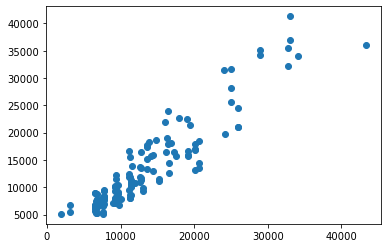

In [570]:
plt.scatter(y_train_pred, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

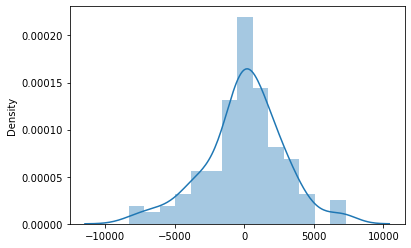

In [571]:
res=y_train_pred-y_train
sns.distplot(res)

## predicting the values in the test data

In [572]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,...,spdi,cylindernumber_5,cylindernumber_4,cylindernumber_6,cylindernumber_2,l,ohc,ohcf,ohcv,rotor
160,0,0,1,0,1,0,95.7,166.3,64.4,2094,...,0,0,1,0,0,0,1,0,0,0
186,2,0,1,0,1,0,97.3,171.7,65.5,2275,...,0,0,1,0,0,0,1,0,0,0
59,1,0,1,1,1,0,98.8,177.8,66.5,2385,...,0,0,1,0,0,0,1,0,0,0
165,1,0,1,1,0,0,94.5,168.7,64.0,2265,...,0,0,1,0,0,0,0,0,0,0
140,2,0,1,1,1,0,93.3,157.3,63.8,2240,...,0,0,1,0,0,0,0,1,0,0


In [573]:
var_nums = ['symboling', 'wheelbase', 'carlength', 'carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']


In [574]:
df_test[var_nums] = mn.transform(df_test[var_nums])

In [575]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,...,spdi,cylindernumber_5,cylindernumber_4,cylindernumber_6,cylindernumber_2,l,ohc,ohcf,ohcv,rotor
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,0.583871,0.112903,0.822581,0.435484,0.580645,0.032258,0.437764,0.559481,0.480376,0.428470,...,0.048387,0.032258,0.854839,0.080645,0.0,0.048387,0.806452,0.048387,0.064516,0.0
std,0.271724,0.319058,0.385142,0.499868,0.497482,0.178127,0.212861,0.189947,0.165440,0.179488,...,0.216335,0.178127,0.355139,0.274512,0.0,0.216335,0.398304,0.216335,0.247676,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.128394,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.305275,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,0.600000,0.000000,1.000000,0.000000,1.000000,0.000000,0.387931,0.547967,0.441667,0.406129,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.564876,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,0.935609,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [576]:
y_test=df_test.pop('price')
X_test=df_test

In [577]:
X_test_sm=sm.add_constant(X_test[X.columns])


In [578]:
y_test_pred=lr_7.predict(X_test_sm)

In [579]:
res_test=y_test_pred-y_test


In [580]:
from sklearn.metrics import r2_score

In [583]:
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_train

0.8689092797630618

In [584]:
r2_score_test=r2_score(y_test,y_test_pred)
r2_score_test

0.8537380289522122